In [1]:
import pandas as pd
import numpy as np

In [2]:
BS = pd.read_excel('BS.xlsx',converters = {u'code':str})
BS

,code,time,type,asset,equity
0,000001,2014-06-30,A,2.136475e+12,1.209400e+11
1,000001,2015-06-30,A,2.570508e+12,1.508800e+11
2,000001,2016-06-30,A,2.800983e+12,1.917000e+11
3,000001,2017-06-30,A,3.092142e+12,2.114540e+11
4,000001,2018-06-30,A,3.367399e+12,2.281410e+11
...,...,...,...,...,...
27035,688799,2021-06-30,A,9.679496e+08,7.322165e+08
27036,688819,2021-06-30,A,2.684858e+10,1.206134e+10
27037,688981,2020-06-30,A,1.443636e+11,9.330745e+10
27038,688981,2021-06-30,A,2.077294e+11,1.470942e+11


In [3]:
Pro = pd.read_excel('profit.xlsx',converters = {u'code':str})
Pro

,code,time,type,profit
0,000001,2014-06-30,A,1.334500e+10
1,000001,2015-06-30,A,1.526700e+10
2,000001,2016-06-30,A,1.615600e+10
3,000001,2017-06-30,A,1.646800e+10
4,000001,2018-06-30,A,1.740200e+10
...,...,...,...,...
27035,688799,2021-06-30,A,8.304060e+07
27036,688819,2021-06-30,A,8.304873e+08
27037,688981,2020-06-30,A,1.429391e+09
27038,688981,2021-06-30,A,5.074385e+09


In [4]:
# BS['code'] = BS['code'].map(lambda x:str(x))
# Pro['code'] = Pro['code'].map(lambda x:str(x))

In [4]:
BS['uni'] = BS['code'].str.cat(BS['time'])

In [5]:
Pro['uni'] = Pro['code'].str.cat(Pro['time'])

In [6]:
df = pd.merge(BS, Pro, on='uni', how='inner')
df = df.iloc[:, np.r_[0:2,3:5,9,5]]
df.columns = ['code','time','asset','equity','profit','uni']
df

,code,time,asset,equity,profit,uni
0,000001,2014-06-30,2.136475e+12,1.209400e+11,1.334500e+10,0000012014-06-30
1,000001,2015-06-30,2.570508e+12,1.508800e+11,1.526700e+10,0000012015-06-30
2,000001,2016-06-30,2.800983e+12,1.917000e+11,1.615600e+10,0000012016-06-30
3,000001,2017-06-30,3.092142e+12,2.114540e+11,1.646800e+10,0000012017-06-30
4,000001,2018-06-30,3.367399e+12,2.281410e+11,1.740200e+10,0000012018-06-30
...,...,...,...,...,...,...
27035,688799,2021-06-30,9.679496e+08,7.322165e+08,8.304060e+07,6887992021-06-30
27036,688819,2021-06-30,2.684858e+10,1.206134e+10,8.304873e+08,6888192021-06-30
27037,688981,2020-06-30,1.443636e+11,9.330745e+10,1.429391e+09,6889812020-06-30
27038,688981,2021-06-30,2.077294e+11,1.470942e+11,5.074385e+09,6889812021-06-30


In [7]:
#对日期进行处理
'''
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].apply(lambda x:x.year)
df['month'] = df['time'].apply(lambda x:x.month)
df_clear = df.drop(df[(df['month']==1) | (df['month']==3) | (df['month']==9)].index)
df_clear
'''

"\ndf['time'] = pd.to_datetime(df['time'])\ndf['year'] = df['time'].apply(lambda x:x.year)\ndf['month'] = df['time'].apply(lambda x:x.month)\ndf_clear = df.drop(df[(df['month']==1) | (df['month']==3) | (df['month']==9)].index)\ndf_clear\n"

In [7]:
#计算OP和INV
df['OP'] = df['profit']/df['equity']
df['INV'] = df['asset'].groupby(by = df['code']).apply(lambda x:x.pct_change())
df

,code,time,asset,equity,profit,uni,OP,INV
0,000001,2014-06-30,2.136475e+12,1.209400e+11,1.334500e+10,0000012014-06-30,0.110344,NaN
1,000001,2015-06-30,2.570508e+12,1.508800e+11,1.526700e+10,0000012015-06-30,0.101186,0.203154
2,000001,2016-06-30,2.800983e+12,1.917000e+11,1.615600e+10,0000012016-06-30,0.084278,0.089661
3,000001,2017-06-30,3.092142e+12,2.114540e+11,1.646800e+10,0000012017-06-30,0.077880,0.103949
4,000001,2018-06-30,3.367399e+12,2.281410e+11,1.740200e+10,0000012018-06-30,0.076277,0.089018
...,...,...,...,...,...,...,...,...
27035,688799,2021-06-30,9.679496e+08,7.322165e+08,8.304060e+07,6887992021-06-30,0.113410,NaN
27036,688819,2021-06-30,2.684858e+10,1.206134e+10,8.304873e+08,6888192021-06-30,0.068855,NaN
27037,688981,2020-06-30,1.443636e+11,9.330745e+10,1.429391e+09,6889812020-06-30,0.015319,NaN
27038,688981,2021-06-30,2.077294e+11,1.470942e+11,5.074385e+09,6889812021-06-30,0.034498,0.438932


In [8]:
#读取PB数据
PB = pd.read_excel('PB.xlsx',converters = {u'code':str})

In [9]:
#处理PB数据
PB['uni'] = PB['code'].str.cat(PB['time'])

In [10]:
#生成BM变量并处理缺失值
PB['time'] = pd.to_datetime(PB['time'])
BM = PB.copy()
BM['BM']=1/BM['pb']
del BM['pb']
BM

,code,time,uni,BM
0,000001,2015-06-30,0000012015-06-30,0.725200
1,000001,2016-06-30,0000012016-06-30,1.283313
2,000001,2017-06-30,0000012017-06-30,1.311536
3,000001,2018-06-30,0000012018-06-30,1.461736
4,000001,2019-06-30,0000012019-06-30,1.084532
...,...,...,...,...
23504,688777,2021-06-30,6887772021-06-30,0.089126
23505,688788,2021-06-30,6887882021-06-30,0.270006
23506,688819,2021-06-30,6888192021-06-30,0.278883
23507,688981,2021-06-30,6889812021-06-30,10.610642


In [11]:
#分组后线性插值
data = BM[['code','BM']]
print(data['BM'].isna().sum())
data_group= BM.groupby('code')
data = data_group['BM'].transform(lambda x: x.interpolate(method='linear',limit_direction='both'))

150


In [12]:
BM = pd.concat([BM.iloc[:,0:3], data], axis=1)
BM.isnull().sum()

code    0
time    0
uni     0
BM      0
dtype: int64

In [13]:
#合并BM和df
df1 = pd.merge(df, BM, on='uni', how='left')
df1 = df1.iloc[:, np.r_[0:2,5,10,6:8]]
df1.columns = ['code','time','uni','BM','OP','INV']
df1

,code,time,uni,BM,OP,INV
0,000001,2014-06-30,0000012014-06-30,NaN,0.110344,NaN
1,000001,2015-06-30,0000012015-06-30,0.725200,0.101186,0.203154
2,000001,2016-06-30,0000012016-06-30,1.283313,0.084278,0.089661
3,000001,2017-06-30,0000012017-06-30,1.311536,0.077880,0.103949
4,000001,2018-06-30,0000012018-06-30,1.461736,0.076277,0.089018
...,...,...,...,...,...,...
27035,688799,2021-06-30,6887992021-06-30,NaN,0.113410,NaN
27036,688819,2021-06-30,6888192021-06-30,0.278883,0.068855,NaN
27037,688981,2020-06-30,6889812020-06-30,NaN,0.015319,NaN
27038,688981,2021-06-30,6889812021-06-30,10.610642,0.034498,0.438932


In [14]:
#读取个股数据
stock = pd.read_excel('stock.xlsx',converters = {u'code':str})
stock

,code,time,close,mc,return
0,000001,2014-06,9.91,6.630839e+07,0.048286
1,000001,2014-07,10.87,7.273181e+07,0.096872
2,000001,2014-08,10.25,6.858383e+07,-0.057038
3,000001,2014-09,10.14,9.974426e+07,-0.010732
4,000001,2014-10,11.03,1.084989e+08,0.087771
...,...,...,...,...,...
306007,689009,2021-09,80.90,4.898648e+05,0.078667
306008,689009,2021-10,64.00,2.835167e+06,-0.208900
306009,689009,2021-11,60.84,2.695180e+06,-0.049375
306010,689009,2021-12,70.07,3.104065e+06,0.151709


In [15]:
#动量因子
mom = stock.iloc[:,0:3]
mom['shift'] = mom['close'].shift(axis=0)
mom['acc_return'] = mom['shift'].pct_change(11)
mom = mom.iloc[:,np.r_[0:2,4]].dropna()
mom['time'] = mom['time'].astype(str) + '-30'
mom['uni'] = mom['code'].str.cat(mom['time'])
mom

,code,time,acc_return,uni
12,000001,2015-06-30,0.545913,0000012015-06-30
13,000001,2015-07-30,0.337626,0000012015-07-30
14,000001,2015-08-30,0.205854,0000012015-08-30
15,000001,2015-09-30,0.091716,0000012015-09-30
16,000001,2015-10-30,-0.048957,0000012015-10-30
...,...,...,...,...
306007,689009,2021-09-30,0.523771,6890092021-09-30
306008,689009,2021-10-30,0.699580,6890092021-10-30
306009,689009,2021-11-30,-0.103013,6890092021-11-30
306010,689009,2021-12-30,-0.291074,6890092021-12-30


In [16]:
#ESG评级
ESG = pd.read_excel('2015.xlsx')
num_list = [2016,2017,2018,2019,2020,2021]
for i in range(6):
    table = pd.read_excel('{}.xlsx'.format(num_list[i]))
    ESG = ESG.append(table)

In [17]:
ESG = ESG.dropna()
ESG.columns= ['code','name','time','rate','industry']
ESG['code'] = ESG['code'].map(lambda x: str(x)[:-3])
ESG

,code,name,time,rate,industry
1,000001,平安银行,2015-06-30,B-,货币金融服务
2,000002,万科,2015-06-30,C+,房地产业
3,000009,宝安集团,2015-06-30,C+,综合
4,000559,万向钱潮,2015-06-30,B-,汽车制造业
5,000783,长江证券,2015-06-30,B-,资本市场服务
...,...,...,...,...,...
795,688029,南微医学,2021-06-30,B-,专用设备制造业
796,688088,虹软科技,2021-06-30,C+,软件和信息技术服务业
797,688099,晶晨股份,2021-06-30,C+,软件和信息技术服务业
798,688208,道通科技,2021-06-30,B-,计算机、通信和其他电子设备制造业


In [50]:
indist = pd.read_excel('证监会行业分类标准.xls')
indist["大类"].fillna(method ='ffill', inplace = True)
indist

,大类,industry
0,农、林、牧、渔业,农业
1,农、林、牧、渔业,林业
2,农、林、牧、渔业,畜牧业
3,农、林、牧、渔业,渔业
4,农、林、牧、渔业,农、林、牧、渔服务业
...,...,...
85,文化、体育和娱乐业,广播、电视、电影和影视录音制作业
86,文化、体育和娱乐业,文化艺术业
87,文化、体育和娱乐业,体育
88,文化、体育和娱乐业,娱乐业


In [51]:
ESG = pd.merge(ESG,indist,how='left',on='industry')

In [36]:
abc = ESG['大类'].value_counts()
abc

制造业                  1383
金融业                   509
信息传输、软件和信息技术服务业       302
房地产业                  201
采矿业                   187
交通运输、仓储和邮政业           181
批发和零售业                174
电力、热力、燃气及水的生产和供应业     158
建筑业                   114
文化、体育和娱乐业              92
租赁和商务服务业               70
农、林、牧、渔业               38
水利、环境和公共设施管理业          37
卫生和社会工作                22
科学研究和技术服务业             17
综合                     13
住宿和餐饮业                 10
教育                      7
Name: 大类, dtype: int64

In [37]:
abc.to_excel('行业分布.xlsx')

In [40]:
ESG = ESG[ESG['大类']=='制造业']
ESG

,code,name,time,rate,industry,大类
3,000559,万向钱潮,2015-06-30,B-,汽车制造业,制造业
6,000413,东旭光电,2015-06-30,B-,计算机、通信和其他电子设备制造业,制造业
8,601992,金隅集团,2015-06-30,C+,非金属矿物制品业,制造业
9,000100,TCL科技,2015-06-30,C+,计算机、通信和其他电子设备制造业,制造业
10,000039,中集集团,2015-06-30,B,金属制品业,制造业
...,...,...,...,...,...,...
4185,605358,立昂微,2021-06-30,B,计算机、通信和其他电子设备制造业,制造业
4186,688002,睿创微纳,2021-06-30,B-,计算机、通信和其他电子设备制造业,制造业
4187,688029,南微医学,2021-06-30,B-,专用设备制造业,制造业
4190,688208,道通科技,2021-06-30,B-,计算机、通信和其他电子设备制造业,制造业


In [18]:
#评级替换成数值
letter_rate = ['A+','A','A-','B+','B','B-','C+','C','C-','D']
num_rate = [10,9,8,7,6,5,4,3,2,1]
ESG['rate'].replace(letter_rate,num_rate,inplace=True)
ESG

,code,name,time,rate,industry
1,000001,平安银行,2015-06-30,5,货币金融服务
2,000002,万科,2015-06-30,4,房地产业
3,000009,宝安集团,2015-06-30,4,综合
4,000559,万向钱潮,2015-06-30,5,汽车制造业
5,000783,长江证券,2015-06-30,5,资本市场服务
...,...,...,...,...,...
795,688029,南微医学,2021-06-30,5,专用设备制造业
796,688088,虹软科技,2021-06-30,4,软件和信息技术服务业
797,688099,晶晨股份,2021-06-30,4,软件和信息技术服务业
798,688208,道通科技,2021-06-30,5,计算机、通信和其他电子设备制造业


In [57]:
ESG.groupby(by='大类')['rate'].mean()

大类
交通运输、仓储和邮政业          5.558011
住宿和餐饮业               5.500000
信息传输、软件和信息技术服务业      4.923841
农、林、牧、渔业             5.157895
制造业                  5.322487
卫生和社会工作              4.863636
建筑业                  5.078947
房地产业                 4.656716
批发和零售业               5.120690
教育                   5.000000
文化、体育和娱乐业            4.836957
水利、环境和公共设施管理业        5.216216
电力、热力、燃气及水的生产和供应业    5.443038
科学研究和技术服务业           5.470588
租赁和商务服务业             4.771429
综合                   4.615385
采矿业                  5.245989
金融业                  5.591356
Name: rate, dtype: float64

In [19]:
ESG['time'] = ESG['time'].apply(lambda x: x.strftime('%Y-%m-%d'))
ESG['uni'] = ESG['code'].str.cat(ESG['time'])
ESG

,code,name,time,rate,industry,uni
1,000001,平安银行,2015-06-30,5,货币金融服务,0000012015-06-30
2,000002,万科,2015-06-30,4,房地产业,0000022015-06-30
3,000009,宝安集团,2015-06-30,4,综合,0000092015-06-30
4,000559,万向钱潮,2015-06-30,5,汽车制造业,0005592015-06-30
5,000783,长江证券,2015-06-30,5,资本市场服务,0007832015-06-30
...,...,...,...,...,...,...
795,688029,南微医学,2021-06-30,5,专用设备制造业,6880292021-06-30
796,688088,虹软科技,2021-06-30,4,软件和信息技术服务业,6880882021-06-30
797,688099,晶晨股份,2021-06-30,4,软件和信息技术服务业,6880992021-06-30
798,688208,道通科技,2021-06-30,5,计算机、通信和其他电子设备制造业,6882082021-06-30


In [20]:
#合并mom,ESG与df1合并
df1 = pd.merge(df1, mom, on='uni', how='inner')
df1 = pd.merge(df1, ESG, on='uni', how='inner')
df1 = df1.iloc[:, np.r_[0:6,8,12]]
df1.columns = ['code','time','uni','BM','OP','INV','MOM','ESG']
df1

,code,time,uni,BM,OP,INV,MOM,ESG
0,000001,2015-06-30,0000012015-06-30,0.725200,0.101186,0.203154,0.545913,5
1,000001,2016-06-30,0000012016-06-30,1.283313,0.084278,0.089661,-0.274415,5
2,000001,2017-06-30,0000012017-06-30,1.311536,0.077880,0.103949,0.057471,6
3,000001,2018-06-30,0000012018-06-30,1.461736,0.076277,0.089018,0.084132,6
4,000001,2019-06-30,0000012019-06-30,1.084532,0.078086,0.066332,0.339934,7
...,...,...,...,...,...,...,...,...
3853,688169,2021-06-30,6881692021-06-30,0.091410,0.099620,0.281023,2.539400,4
3854,688208,2021-06-30,6882082021-06-30,0.066073,0.090813,0.254416,0.335986,5
3855,688321,2021-06-30,6883212021-06-30,0.080311,-0.005327,0.101215,-0.389776,5
3856,688363,2021-06-30,6883632021-06-30,0.039265,0.079985,0.226314,0.819473,6


In [21]:
#提取df1 year
df1['time'] = pd.to_datetime(df1['time'])
df1['year'] = df1['time'].apply(lambda x:x.year)
df1

,code,time,uni,BM,OP,INV,MOM,ESG,year
0,000001,2015-06-30,0000012015-06-30,0.725200,0.101186,0.203154,0.545913,5,2015
1,000001,2016-06-30,0000012016-06-30,1.283313,0.084278,0.089661,-0.274415,5,2016
2,000001,2017-06-30,0000012017-06-30,1.311536,0.077880,0.103949,0.057471,6,2017
3,000001,2018-06-30,0000012018-06-30,1.461736,0.076277,0.089018,0.084132,6,2018
4,000001,2019-06-30,0000012019-06-30,1.084532,0.078086,0.066332,0.339934,7,2019
...,...,...,...,...,...,...,...,...,...
3853,688169,2021-06-30,6881692021-06-30,0.091410,0.099620,0.281023,2.539400,4,2021
3854,688208,2021-06-30,6882082021-06-30,0.066073,0.090813,0.254416,0.335986,5,2021
3855,688321,2021-06-30,6883212021-06-30,0.080311,-0.005327,0.101215,-0.389776,5,2021
3856,688363,2021-06-30,6883632021-06-30,0.039265,0.079985,0.226314,0.819473,6,2021


In [22]:
#处理个股日期
stock['time'] = pd.to_datetime(stock['time'])
stock['year'] = stock['time'].apply(lambda x:x.year)
stock['month'] = stock['time'].apply(lambda x:x.month)
stock = stock.dropna()

In [23]:
group = stock.iloc[:, np.r_[0,3:7]]
#group['uni'] = group['code']*10000 + group['year']
#group['uni'] = group['uni'].map(lambda x:str(x))
group

,code,mc,return,year,month
0,000001,6.630839e+07,0.048286,2014,6
1,000001,7.273181e+07,0.096872,2014,7
2,000001,6.858383e+07,-0.057038,2014,8
3,000001,9.974426e+07,-0.010732,2014,9
4,000001,1.084989e+08,0.087771,2014,10
...,...,...,...,...,...
306007,689009,4.898648e+05,0.078667,2021,9
306008,689009,2.835167e+06,-0.208900,2021,10
306009,689009,2.695180e+06,-0.049375,2021,11
306010,689009,3.104065e+06,0.151709,2021,12


In [24]:
group['uni'] = group['code'] + group['year'].astype(str)
#group['uni'] = group['uni'].map(lambda x:str(x))
group

C:\Users\olivia\AppData\Local\Temp/ipykernel_12984/1897185157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['uni'] = group['code'] + group['year'].astype(str)


,code,mc,return,year,month,uni
0,000001,6.630839e+07,0.048286,2014,6,0000012014
1,000001,7.273181e+07,0.096872,2014,7,0000012014
2,000001,6.858383e+07,-0.057038,2014,8,0000012014
3,000001,9.974426e+07,-0.010732,2014,9,0000012014
4,000001,1.084989e+08,0.087771,2014,10,0000012014
...,...,...,...,...,...,...
306007,689009,4.898648e+05,0.078667,2021,9,6890092021
306008,689009,2.835167e+06,-0.208900,2021,10,6890092021
306009,689009,2.695180e+06,-0.049375,2021,11,6890092021
306010,689009,3.104065e+06,0.151709,2021,12,6890092021


In [25]:
#划分因子组合
a = df1
a['code'] = a['code'].apply(str)
a['year'] = a['year'].apply(str)
a['uni'] = a['code'] + a['year']
a

,code,time,uni,BM,OP,INV,MOM,ESG,year
0,000001,2015-06-30,0000012015,0.725200,0.101186,0.203154,0.545913,5,2015
1,000001,2016-06-30,0000012016,1.283313,0.084278,0.089661,-0.274415,5,2016
2,000001,2017-06-30,0000012017,1.311536,0.077880,0.103949,0.057471,6,2017
3,000001,2018-06-30,0000012018,1.461736,0.076277,0.089018,0.084132,6,2018
4,000001,2019-06-30,0000012019,1.084532,0.078086,0.066332,0.339934,7,2019
...,...,...,...,...,...,...,...,...,...
3853,688169,2021-06-30,6881692021,0.091410,0.099620,0.281023,2.539400,4,2021
3854,688208,2021-06-30,6882082021,0.066073,0.090813,0.254416,0.335986,5,2021
3855,688321,2021-06-30,6883212021,0.080311,-0.005327,0.101215,-0.389776,5,2021
3856,688363,2021-06-30,6883632021,0.039265,0.079985,0.226314,0.819473,6,2021


In [26]:
b = stock.drop(stock[stock['month'] != 6].index)
b['code'] = b['code'].apply(str)
b['year'] = b['year'].apply(str)
b['uni'] = b['code'] + b['year']
b

,code,time,close,mc,return,year,month,uni
0,000001,2014-06-01,9.91,6.630839e+07,0.048286,2014,6,0000012014
12,000001,2015-06-01,14.54,1.716310e+08,-0.050914,2015,6,0000012015
24,000001,2016-06-01,8.70,1.272913e+08,0.004295,2016,6,0000012016
36,000001,2017-06-01,9.39,1.588599e+08,0.020652,2017,6,0000012017
48,000001,2018-06-01,9.09,1.560775e+08,-0.107073,2018,6,0000012018
...,...,...,...,...,...,...,...,...
305882,688777,2021-06-01,94.15,3.976655e+06,0.005338,2021,6,6887772021
305922,688788,2021-06-01,145.38,2.530472e+06,0.019710,2021,6,6887882021
305969,688819,2021-06-01,44.49,4.496084e+06,0.042653,2021,6,6888192021
305988,688981,2021-06-01,61.82,6.773327e+07,0.098632,2021,6,6889812021


In [27]:
p = pd.merge(a, b, on='uni', how='inner')
p = p.iloc[:, np.r_[0,8,13,12,3:8]]
p.columns = ['code','year','R','MC','BM','OP','INV','MOM','ESG']
p

,code,year,R,MC,BM,OP,INV,MOM,ESG
0,000001,2015,-0.050914,1.716310e+08,0.725200,0.101186,0.203154,0.545913,5
1,000001,2016,0.004295,1.272913e+08,1.283313,0.084278,0.089661,-0.274415,5
2,000001,2017,0.020652,1.588599e+08,1.311536,0.077880,0.103949,0.057471,6
3,000001,2018,-0.107073,1.560775e+08,1.461736,0.076277,0.089018,0.084132,6
4,000001,2019,0.143633,2.366060e+08,1.084532,0.078086,0.066332,0.339934,7
...,...,...,...,...,...,...,...,...,...
3853,688169,2021,-0.054723,5.658932e+07,0.091410,0.099620,0.281023,2.539400,4
3854,688208,2021,0.151423,2.356603e+07,0.066073,0.090813,0.254416,0.335986,5
3855,688321,2021,0.209162,1.156470e+07,0.080311,-0.005327,0.101215,-0.389776,5
3856,688363,2021,0.032553,2.593600e+07,0.039265,0.079985,0.226314,0.819473,6


In [28]:
def split_BM(x):
    # 初始设定为M因此只用标记‘H’和‘L’部分
    x.loc[x['BM'] >= x['BM'].quantile(0.7),'group_BM']='H'
    x.loc[x['BM'] < x['BM'].quantile(0.3),'group_BM']='L'
    return x

def split_OP(x):
    # 初始设定为M因此只用标记‘R’和‘W’部分
    x.loc[x['OP'] >= x['OP'].quantile(0.7),'group_OP']='R'
    x.loc[x['OP'] < x['OP'].quantile(0.3),'group_OP']='W'
    return x

def split_INV(x):
    # 初始设定为M因此只用标记‘C’和‘A’部分
    x.loc[x['INV'] >= x['INV'].quantile(0.7),'group_INV']='A'
    x.loc[x['INV'] < x['INV'].quantile(0.3),'group_INV']='C'
    return x

def split_MOM(x):
    # 初始设定为M因此只用标记‘HM’和‘LM’部分
    x.loc[x['MOM'] >= x['MOM'].quantile(0.7),'group_MOM']='HM'
    x.loc[x['MOM'] < x['MOM'].quantile(0.3),'group_MOM']='LM'
    return x

def split_ESG(x):
    # 初始设定为M因此只用标记‘G’和‘P’部分
    x.loc[x['ESG'] >= 6 ,'group_ESG']='G'
    x.loc[x['ESG'] < 5 ,'group_ESG']='P'
    return x

def split_SIZE(x):
    x.loc[x['MC'] >= x['MC'].mean(),'group_SIZE']='B'
    return x

In [29]:
p['group_SIZE']='S'
p=p.groupby('year').apply(split_SIZE).reset_index(drop=True)
p

,code,year,R,MC,BM,OP,INV,MOM,ESG,group_SIZE
0,000001,2015,-0.050914,1.716310e+08,0.725200,0.101186,0.203154,0.545913,5,B
1,000001,2016,0.004295,1.272913e+08,1.283313,0.084278,0.089661,-0.274415,5,B
2,000001,2017,0.020652,1.588599e+08,1.311536,0.077880,0.103949,0.057471,6,B
3,000001,2018,-0.107073,1.560775e+08,1.461736,0.076277,0.089018,0.084132,6,B
4,000001,2019,0.143633,2.366060e+08,1.084532,0.078086,0.066332,0.339934,7,B
...,...,...,...,...,...,...,...,...,...,...
3853,688169,2021,-0.054723,5.658932e+07,0.091410,0.099620,0.281023,2.539400,4,S
3854,688208,2021,0.151423,2.356603e+07,0.066073,0.090813,0.254416,0.335986,5,S
3855,688321,2021,0.209162,1.156470e+07,0.080311,-0.005327,0.101215,-0.389776,5,S
3856,688363,2021,0.032553,2.593600e+07,0.039265,0.079985,0.226314,0.819473,6,S


In [30]:
# 设定分组初始值为 M (Median)
p['group_BM']='M'
p=p.groupby('year').apply(split_BM).reset_index(drop=True)

p['group_OP']='M'
p=p.groupby('year').apply(split_OP).reset_index(drop=True)

p['group_INV']='M'
p=p.groupby('year').apply(split_INV).reset_index(drop=True)

p['group_MOM']='M'
p=p.groupby('year').apply(split_MOM).reset_index(drop=True)

p['group_ESG']='M'
p=p.groupby('year').apply(split_ESG).reset_index(drop=True)

p

,code,year,R,MC,BM,OP,INV,MOM,ESG,group_SIZE,group_BM,group_OP,group_INV,group_MOM,group_ESG
0,000001,2015,-0.050914,1.716310e+08,0.725200,0.101186,0.203154,0.545913,5,B,H,R,M,LM,M
1,000001,2016,0.004295,1.272913e+08,1.283313,0.084278,0.089661,-0.274415,5,B,H,R,M,HM,M
2,000001,2017,0.020652,1.588599e+08,1.311536,0.077880,0.103949,0.057471,6,B,H,M,M,M,G
3,000001,2018,-0.107073,1.560775e+08,1.461736,0.076277,0.089018,0.084132,6,B,H,M,M,HM,G
4,000001,2019,0.143633,2.366060e+08,1.084532,0.078086,0.066332,0.339934,7,B,H,M,M,HM,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,688169,2021,-0.054723,5.658932e+07,0.091410,0.099620,0.281023,2.539400,4,S,L,R,A,HM,P
3854,688208,2021,0.151423,2.356603e+07,0.066073,0.090813,0.254416,0.335986,5,S,L,M,A,HM,M
3855,688321,2021,0.209162,1.156470e+07,0.080311,-0.005327,0.101215,-0.389776,5,S,L,W,M,LM,M
3856,688363,2021,0.032553,2.593600e+07,0.039265,0.079985,0.226314,0.819473,6,S,L,M,A,HM,G


In [31]:
p['group1'] = p['group_SIZE']+'/'+p['group_BM']
p['group2'] = p['group_SIZE']+'/'+p['group_OP']
p['group3'] = p['group_SIZE']+'/'+p['group_INV']
p['group4'] = p['group_SIZE']+'/'+p['group_MOM']
p['group5'] = p['group_SIZE']+'/'+p['group_ESG']
p

,code,year,R,MC,BM,OP,INV,MOM,ESG,group_SIZE,group_BM,group_OP,group_INV,group_MOM,group_ESG,group1,group2,group3,group4,group5
0,000001,2015,-0.050914,1.716310e+08,0.725200,0.101186,0.203154,0.545913,5,B,H,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M
1,000001,2016,0.004295,1.272913e+08,1.283313,0.084278,0.089661,-0.274415,5,B,H,R,M,HM,M,B/H,B/R,B/M,B/HM,B/M
2,000001,2017,0.020652,1.588599e+08,1.311536,0.077880,0.103949,0.057471,6,B,H,M,M,M,G,B/H,B/M,B/M,B/M,B/G
3,000001,2018,-0.107073,1.560775e+08,1.461736,0.076277,0.089018,0.084132,6,B,H,M,M,HM,G,B/H,B/M,B/M,B/HM,B/G
4,000001,2019,0.143633,2.366060e+08,1.084532,0.078086,0.066332,0.339934,7,B,H,M,M,HM,G,B/H,B/M,B/M,B/HM,B/G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,688169,2021,-0.054723,5.658932e+07,0.091410,0.099620,0.281023,2.539400,4,S,L,R,A,HM,P,S/L,S/R,S/A,S/HM,S/P
3854,688208,2021,0.151423,2.356603e+07,0.066073,0.090813,0.254416,0.335986,5,S,L,M,A,HM,M,S/L,S/M,S/A,S/HM,S/M
3855,688321,2021,0.209162,1.156470e+07,0.080311,-0.005327,0.101215,-0.389776,5,S,L,W,M,LM,M,S/L,S/W,S/M,S/LM,S/M
3856,688363,2021,0.032553,2.593600e+07,0.039265,0.079985,0.226314,0.819473,6,S,L,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G


In [32]:
p['uni'] = p['code'] + p['year']

In [33]:
port = pd.merge(group,p,how='left',on='uni')
port = port.dropna()

In [34]:
port['date'] = port['year_x']*100 + port['month']
port

,code_x,mc,return,year_x,month,uni,code_y,year_y,R,MC,...,group_OP,group_INV,group_MOM,group_ESG,group1,group2,group3,group4,group5,date
7,000001,1.370254e+08,-0.120581,2015,1,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201501
8,000001,1.376156e+08,0.004307,2015,2,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201502
9,000001,1.549282e+08,0.125804,2015,3,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201503
10,000001,1.971277e+08,0.283535,2015,4,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201504
11,000001,1.808381e+08,-0.082635,2015,5,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302950,688396,2.481644e+07,-0.246000,2021,8,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202108
302951,688396,2.266064e+07,-0.086870,2021,9,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202109
302952,688396,2.676910e+07,-0.102687,2021,10,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202110
302953,688396,3.101541e+07,0.158627,2021,11,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202111


In [35]:
# 计算group1组内各支股票收益率市值加权综合收益率
port_ret=port.groupby(['date','group1']).apply(lambda x: (x['return']*x['mc']).sum()/x.mc.sum())
port_ret=port_ret.reset_index()
port_ret.rename(columns={port_ret.columns[-1]:'ret'},inplace=True) #重命名一下

# 改变一下表格形式，使用透视表功能
port_ret=port_ret.pivot(index='date',columns='group1',values='ret')
port_ret = port_ret.iloc[6:,:]
port_ret

group1,B/H,B/L,B/M,S/H,S/L,S/M
date,,,,,,
201507,-0.087382,-0.150174,-0.156183,-0.175143,-0.083729,-0.163444
201508,-0.121243,-0.123953,-0.097535,-0.112154,-0.160921,-0.109900
201509,-0.026860,-0.034777,-0.052590,-0.062591,-0.050241,-0.066935
201510,0.065239,0.177656,0.091189,0.107728,0.180347,0.165984
201511,0.012319,-0.041212,-0.021297,0.010956,0.046428,0.024700
...,...,...,...,...,...,...
202108,0.053581,-0.006070,0.072612,0.146763,-0.004581,0.108773
202109,0.036828,0.043328,0.026756,0.058016,-0.005586,-0.002665
202110,-0.022005,0.039789,0.010063,-0.060536,0.036144,-0.002508


In [36]:
# 计算group2组内各支股票收益率市值加权综合收益率
port_ret2=port.groupby(['date','group2']).apply(lambda x: (x['return']*x['mc']).sum()/x.mc.sum())
port_ret2=port_ret2.reset_index()
port_ret2.rename(columns={port_ret2.columns[-1]:'ret'},inplace=True) #重命名一下

# 改变一下表格形式，使用透视表功能
port_ret2=port_ret2.pivot(index='date',columns='group2',values='ret')
port_ret2 = port_ret2.iloc[6:,:]
port_ret2.head()

group2,B/M,B/R,B/W,S/M,S/R,S/W
date,,,,,,
201507,-0.117791,-0.109759,-0.068264,-0.134822,-0.118003,-0.162926
201508,-0.107407,-0.108100,-0.159239,-0.132537,-0.145889,-0.103245
201509,-0.044620,-0.010512,-0.092644,-0.062625,-0.023936,-0.089094
201510,0.077556,0.074197,0.078609,0.169947,0.137308,0.157153
201511,-0.014213,0.023920,-0.048660,0.010220,0.080883,0.006880


In [37]:
# 计算group3组内各支股票收益率市值加权综合收益率
port_ret3=port.groupby(['date','group3']).apply(lambda x: (x['return']*x['mc']).sum()/x.mc.sum())
port_ret3=port_ret3.reset_index()
port_ret3.rename(columns={port_ret3.columns[-1]:'ret'},inplace=True) #重命名一下

# 改变一下表格形式，使用透视表功能
port_ret3=port_ret3.pivot(index='date',columns='group3',values='ret')
port_ret3 = port_ret3.iloc[6:,:]
port_ret3

group3,B/A,B/C,B/M,S/A,S/C,S/M
date,,,,,,
201507,-0.154314,-0.083043,-0.106439,-0.101660,-0.189368,-0.141069
201508,-0.145390,-0.124779,-0.100129,-0.155354,-0.106705,-0.114315
201509,-0.030020,-0.055761,-0.016029,-0.035294,-0.093412,-0.060969
201510,0.128021,0.062071,0.067642,0.174251,0.140745,0.151788
201511,0.030437,-0.019500,0.010339,0.061527,0.001304,0.014193
...,...,...,...,...,...,...
202108,0.020623,0.057155,0.023987,0.051576,0.120627,0.091624
202109,0.040782,0.076628,0.017897,0.000071,0.011746,0.026431
202110,0.024196,-0.031439,0.023801,0.011437,-0.026403,-0.008358


In [38]:
# 计算group4组内各支股票收益率市值加权综合收益率
port_ret4=port.groupby(['date','group4']).apply(lambda x: (x['return']*x['mc']).sum()/x.mc.sum())
port_ret4=port_ret4.reset_index()
port_ret4.rename(columns={port_ret4.columns[-1]:'ret'},inplace=True) #重命名一下

# 改变一下表格形式，使用透视表功能
port_ret4=port_ret4.pivot(index='date',columns='group4',values='ret')
port_ret4 = port_ret4.iloc[6:,:]
port_ret4

group4,B/HM,B/LM,B/M,S/HM,S/LM,S/M
date,,,,,,
201507,-0.154839,-0.063220,-0.153946,-0.121946,-0.133058,-0.156523
201508,-0.123283,-0.126219,-0.084881,-0.154310,-0.113043,-0.113853
201509,-0.056360,-0.026517,-0.024021,-0.052645,-0.063165,-0.064289
201510,0.144167,0.051780,0.067001,0.184125,0.126087,0.154705
201511,-0.021849,0.004963,0.020290,0.032227,0.028929,0.026719
...,...,...,...,...,...,...
202108,0.031067,-0.033423,0.031316,0.144841,-0.017692,0.116460
202109,0.031514,0.049492,0.046288,-0.032199,0.044924,0.028798
202110,0.028896,0.024868,-0.007598,0.005811,-0.000978,-0.023773


In [39]:
# 计算group5组内各支股票收益率市值加权综合收益率
port_ret5=port.groupby(['date','group5']).apply(lambda x: (x['return']*x['mc']).sum()/x.mc.sum())
port_ret5=port_ret5.reset_index()
port_ret5.rename(columns={port_ret5.columns[-1]:'ret'},inplace=True) #重命名一下

# 改变一下表格形式，使用透视表功能
port_ret5=port_ret5.pivot(index='date',columns='group5',values='ret')
port_ret5 = port_ret5.iloc[6:,:]
port_ret5

group5,B/G,B/M,B/P,S/G,S/M,S/P
date,,,,,,
201507,-0.099120,-0.093680,-0.141756,-0.160034,-0.130628,-0.137997
201508,-0.092692,-0.142230,-0.120271,-0.111818,-0.126621,-0.135424
201509,-0.014437,-0.037362,-0.068348,-0.075489,-0.054555,-0.059139
201510,0.063031,0.070226,0.118697,0.140939,0.170075,0.149819
201511,0.016447,-0.014005,0.002611,0.034364,0.021631,0.035086
...,...,...,...,...,...,...
202108,0.036517,-0.003728,0.076834,0.087546,0.087107,0.103997
202109,0.023186,0.082893,0.034741,0.004895,0.026393,0.014358
202110,0.020069,0.007094,-0.072911,-0.005980,-0.012434,-0.001595


In [40]:
port

,code_x,mc,return,year_x,month,uni,code_y,year_y,R,MC,...,group_OP,group_INV,group_MOM,group_ESG,group1,group2,group3,group4,group5,date
7,000001,1.370254e+08,-0.120581,2015,1,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201501
8,000001,1.376156e+08,0.004307,2015,2,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201502
9,000001,1.549282e+08,0.125804,2015,3,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201503
10,000001,1.971277e+08,0.283535,2015,4,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201504
11,000001,1.808381e+08,-0.082635,2015,5,0000012015,000001,2015,-0.050914,1.716310e+08,...,R,M,LM,M,B/H,B/R,B/M,B/LM,B/M,201505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302950,688396,2.481644e+07,-0.246000,2021,8,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202108
302951,688396,2.266064e+07,-0.086870,2021,9,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202109
302952,688396,2.676910e+07,-0.102687,2021,10,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202110
302953,688396,3.101541e+07,0.158627,2021,11,6883962021,688396,2021,0.464584,2.995746e+07,...,M,A,HM,G,S/L,S/M,S/A,S/HM,S/G,202111


In [40]:
port_ret = pd.concat([port_ret,port_ret2,port_ret3,port_ret4,port_ret5],axis=1)
port_ret

,B/H,B/L,B/M,S/H,S/L,S/M,B/M,B/R,B/W,S/M,...,B/M,S/HM,S/LM,S/M,B/G,B/M,B/P,S/G,S/M,S/P
date,,,,,,,,,,,,,,,,,,,,,
201507,-0.087382,-0.150174,-0.156183,-0.175143,-0.083729,-0.163444,-0.117791,-0.109759,-0.068264,-0.134822,...,-0.153946,-0.121946,-0.133058,-0.156523,-0.099120,-0.093680,-0.141756,-0.160034,-0.130628,-0.137997
201508,-0.121243,-0.123953,-0.097535,-0.112154,-0.160921,-0.109900,-0.107407,-0.108100,-0.159239,-0.132537,...,-0.084881,-0.154310,-0.113043,-0.113853,-0.092692,-0.142230,-0.120271,-0.111818,-0.126621,-0.135424
201509,-0.026860,-0.034777,-0.052590,-0.062591,-0.050241,-0.066935,-0.044620,-0.010512,-0.092644,-0.062625,...,-0.024021,-0.052645,-0.063165,-0.064289,-0.014437,-0.037362,-0.068348,-0.075489,-0.054555,-0.059139
201510,0.065239,0.177656,0.091189,0.107728,0.180347,0.165984,0.077556,0.074197,0.078609,0.169947,...,0.067001,0.184125,0.126087,0.154705,0.063031,0.070226,0.118697,0.140939,0.170075,0.149819
201511,0.012319,-0.041212,-0.021297,0.010956,0.046428,0.024700,-0.014213,0.023920,-0.048660,0.010220,...,0.020290,0.032227,0.028929,0.026719,0.016447,-0.014005,0.002611,0.034364,0.021631,0.035086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,0.053581,-0.006070,0.072612,0.146763,-0.004581,0.108773,0.037513,0.016907,0.043362,0.084777,...,0.031316,0.144841,-0.017692,0.116460,0.036517,-0.003728,0.076834,0.087546,0.087107,0.103997
202109,0.036828,0.043328,0.026756,0.058016,-0.005586,-0.002665,0.032349,0.048885,0.001887,0.028897,...,0.046288,-0.032199,0.044924,0.028798,0.023186,0.082893,0.034741,0.004895,0.026393,0.014358
202110,-0.022005,0.039789,0.010063,-0.060536,0.036144,-0.002508,0.007881,0.015885,0.048288,-0.003644,...,-0.007598,0.005811,-0.000978,-0.023773,0.020069,0.007094,-0.072911,-0.005980,-0.012434,-0.001595


In [41]:
# SMB = （SL + SM +SH+...）/3 -(BL + BM +BH+...)/3

port_ret['SMBBM']=((port_ret.iloc[:,3]+port_ret.iloc[:,4]+port_ret.iloc[:,5])/3 -(port_ret.iloc[:,0]+port_ret.iloc[:,1]+port_ret.iloc[:,2])/3).copy()
port_ret['SMBOP']=((port_ret.iloc[:,9]+port_ret.iloc[:,10]+port_ret.iloc[:,11])/3 -(port_ret.iloc[:,6]+port_ret.iloc[:,7]+port_ret.iloc[:,8])/3).copy()
port_ret['SMBINV']=((port_ret.iloc[:,15]+port_ret.iloc[:,16]+port_ret.iloc[:,17])/3 -(port_ret.iloc[:,12]+port_ret.iloc[:,13]+port_ret.iloc[:,14])/3).copy()
port_ret['SMBMOM']=((port_ret.iloc[:,21]+port_ret.iloc[:,22]+port_ret.iloc[:,23])/3 -(port_ret.iloc[:,18]+port_ret.iloc[:,19]+port_ret.iloc[:,20])/3).copy()
port_ret['SMBESG']=((port_ret.iloc[:,27]+port_ret.iloc[:,28]+port_ret.iloc[:,29])/3 -(port_ret.iloc[:,24]+port_ret.iloc[:,25]+port_ret.iloc[:,26])/3).copy()
port_ret['SMB']=(port_ret['SMBBM']+port_ret['SMBOP']+port_ret['SMBINV']+port_ret['SMBMOM']+port_ret['SMBESG'])/5

port_ret

,B/H,B/L,B/M,S/H,S/L,S/M,B/M,B/R,B/W,S/M,...,B/P,S/G,S/M,S/P,SMBBM,SMBOP,SMBINV,SMBMOM,SMBESG,SMB
date,,,,,,,,,,,,,,,,,,,,,
201507,-0.087382,-0.150174,-0.156183,-0.175143,-0.083729,-0.163444,-0.117791,-0.109759,-0.068264,-0.134822,...,-0.141756,-0.160034,-0.130628,-0.137997,-0.009526,-0.039979,-0.029434,-0.013174,-0.031368,-0.024696
201508,-0.121243,-0.123953,-0.097535,-0.112154,-0.160921,-0.109900,-0.107407,-0.108100,-0.159239,-0.132537,...,-0.120271,-0.111818,-0.126621,-0.135424,-0.013415,-0.002308,-0.002026,-0.015608,-0.006223,-0.007916
201509,-0.026860,-0.034777,-0.052590,-0.062591,-0.050241,-0.066935,-0.044620,-0.010512,-0.092644,-0.062625,...,-0.068348,-0.075489,-0.054555,-0.059139,-0.021847,-0.009293,-0.029288,-0.024400,-0.023012,-0.021568
201510,0.065239,0.177656,0.091189,0.107728,0.180347,0.165984,0.077556,0.074197,0.078609,0.169947,...,0.118697,0.140939,0.170075,0.149819,0.039992,0.078016,0.069684,0.067323,0.069626,0.064928
201511,0.012319,-0.041212,-0.021297,0.010956,0.046428,0.024700,-0.014213,0.023920,-0.048660,0.010220,...,0.002611,0.034364,0.021631,0.035086,0.044092,0.045645,0.018583,0.028157,0.028676,0.033030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,0.053581,-0.006070,0.072612,0.146763,-0.004581,0.108773,0.037513,0.016907,0.043362,0.084777,...,0.076834,0.087546,0.087107,0.103997,0.043611,0.056814,0.054021,0.071550,0.056342,0.056468
202109,0.036828,0.043328,0.026756,0.058016,-0.005586,-0.002665,0.032349,0.048885,0.001887,0.028897,...,0.034741,0.004895,0.026393,0.014358,-0.019049,-0.014118,-0.032353,-0.028590,-0.031725,-0.025167
202110,-0.022005,0.039789,0.010063,-0.060536,0.036144,-0.002508,0.007881,0.015885,0.048288,-0.003644,...,-0.072911,-0.005980,-0.012434,-0.001595,-0.018249,-0.032665,-0.013294,-0.021702,0.008580,-0.015466


In [42]:
# HML = (SH + BH)/2 - (SL + BL)/2
port_ret['HML']=(port_ret['S/H']+port_ret['B/H'])/2-(port_ret['S/L']+port_ret['B/L'])/2

ff5=port_ret.loc[:,['SMB','HML']].copy()
ff5=ff5.reset_index()
ff5.columns=['tradedate','SMB','HML']
ff5

,tradedate,SMB,HML
0,201507,-0.024696,-0.014311
1,201508,-0.007916,0.025738
2,201509,-0.021568,-0.002217
3,201510,0.064928,-0.092518
4,201511,0.033030,0.009029
...,...,...,...
73,202108,0.056468,0.105498
74,202109,-0.025167,0.028551
75,202110,-0.015466,-0.079237
76,202111,0.052616,-0.057778


In [43]:
port_ret2['RMW']=(port_ret2['S/R']+port_ret2['B/R'])/2-(port_ret2['S/W']+port_ret2['B/W'])/2
c= port_ret2.loc[:,'RMW'].copy()
c=c.reset_index()
ff5 = pd.concat([ff5,c],axis=1)

port_ret3['CMA']=(port_ret3['S/C']+port_ret3['B/C'])/2-(port_ret3['S/A']+port_ret3['B/A'])/2
d= port_ret3.loc[:,'CMA'].copy()
d=d.reset_index()
ff5 = pd.concat([ff5,d],axis=1)

port_ret4['MOM']=(port_ret4['S/HM']+port_ret4['B/HM'])/2-(port_ret4['S/LM']+port_ret4['B/LM'])/2
e= port_ret4.loc[:,'MOM'].copy()
e=e.reset_index()
ff5 = pd.concat([ff5,e],axis=1)

port_ret5['ESG']=(port_ret5['S/G']+port_ret5['B/G'])/2-(port_ret5['S/P']+port_ret5['B/P'])/2
f= port_ret5.loc[:,'ESG'].copy()
f=f.reset_index()
ff5 = pd.concat([ff5,f],axis=1)

del ff5['date']
ff5

,tradedate,SMB,HML,RMW,CMA,MOM,ESG
0,201507,-0.024696,-0.014311,0.001714,-0.008219,-0.040254,0.010299
1,201508,-0.007916,0.025738,0.004247,0.034630,-0.019166,0.025593
2,201509,-0.021568,-0.002217,0.073645,-0.041929,-0.009662,0.018780
3,201510,0.064928,-0.092518,-0.012129,-0.049728,0.075212,-0.032273
4,201511,0.033030,0.009029,0.073292,-0.055080,-0.011757,0.006557
...,...,...,...,...,...,...,...
73,202108,0.056468,0.105498,-0.012029,0.052791,0.113511,-0.028384
74,202109,-0.025167,0.028551,-0.000959,0.023760,-0.047551,-0.010509
75,202110,-0.015466,-0.079237,-0.026258,-0.046737,0.005408,0.044298
76,202111,0.052616,-0.057778,-0.021558,-0.033364,-0.022631,-0.031608


In [44]:
#无风险利率
rf = pd.read_csv('rf.csv')
rf

,time,close,rf
0,1,2.246,0.2711
1,2,2.307,0.0272
2,3,2.360,0.0230
3,4,2.379,0.0081
4,5,2.599,0.0925
...,...,...,...
73,74,2.248,0.1469
74,75,2.295,0.0209
75,76,2.237,-0.0253
76,77,2.169,-0.0304


In [45]:
#市场组合收益率
rmkt= pd.read_excel('rmkt.xlsx')
rmkt

,code,time,close,rmkt
0,906,2015-07,4501.573,-0.142479
1,906,2015-08,3929.897,-0.126995
2,906,2015-09,3714.970,-0.054690
3,906,2015-10,4156.086,0.118740
4,906,2015-11,4239.106,0.019976
...,...,...,...,...
73,906,2021-08,5214.029,0.016167
74,906,2021-09,5236.197,0.004252
75,906,2021-10,5256.117,0.003804
76,906,2021-11,5235.134,-0.003992


In [46]:
rmkt_rf = pd.concat([rmkt,rf],axis=1)
rmkt_rf = rmkt_rf.iloc[:, np.r_[1,3,6]]
rmkt_rf['rmkt_rf'] = rmkt_rf['rmkt'] - rmkt_rf['rf']
rmkt_rf

,time,rmkt,rf,rmkt_rf
0,2015-07,-0.142479,0.2711,-0.413579
1,2015-08,-0.126995,0.0272,-0.154195
2,2015-09,-0.054690,0.0230,-0.077690
3,2015-10,0.118740,0.0081,0.110640
4,2015-11,0.019976,0.0925,-0.072524
...,...,...,...,...
73,2021-08,0.016167,0.1469,-0.130733
74,2021-09,0.004252,0.0209,-0.016648
75,2021-10,0.003804,-0.0253,0.029104
76,2021-11,-0.003992,-0.0304,0.026408


In [47]:
ff5 = pd.concat([rmkt_rf,ff5],axis=1)
ff5

,time,rmkt,rf,rmkt_rf,tradedate,SMB,HML,RMW,CMA,MOM,ESG
0,2015-07,-0.142479,0.2711,-0.413579,201507,-0.024696,-0.014311,0.001714,-0.008219,-0.040254,0.010299
1,2015-08,-0.126995,0.0272,-0.154195,201508,-0.007916,0.025738,0.004247,0.034630,-0.019166,0.025593
2,2015-09,-0.054690,0.0230,-0.077690,201509,-0.021568,-0.002217,0.073645,-0.041929,-0.009662,0.018780
3,2015-10,0.118740,0.0081,0.110640,201510,0.064928,-0.092518,-0.012129,-0.049728,0.075212,-0.032273
4,2015-11,0.019976,0.0925,-0.072524,201511,0.033030,0.009029,0.073292,-0.055080,-0.011757,0.006557
...,...,...,...,...,...,...,...,...,...,...,...
73,2021-08,0.016167,0.1469,-0.130733,202108,0.056468,0.105498,-0.012029,0.052791,0.113511,-0.028384
74,2021-09,0.004252,0.0209,-0.016648,202109,-0.025167,0.028551,-0.000959,0.023760,-0.047551,-0.010509
75,2021-10,0.003804,-0.0253,0.029104,202110,-0.015466,-0.079237,-0.026258,-0.046737,0.005408,0.044298
76,2021-11,-0.003992,-0.0304,0.026408,202111,0.052616,-0.057778,-0.021558,-0.033364,-0.022631,-0.031608


In [145]:
ff5.to_excel('factor.xlsx')

In [48]:
f = port.iloc[:, np.r_[26,0:6,10:15]]
f

,date,code_x,mc,return,year_x,month,uni,BM,OP,INV,MOM,ESG
7,201501,000001,1.370254e+08,-0.120581,2015,1,0000012015,0.725200,0.101186,0.203154,0.545913,5.0
8,201502,000001,1.376156e+08,0.004307,2015,2,0000012015,0.725200,0.101186,0.203154,0.545913,5.0
9,201503,000001,1.549282e+08,0.125804,2015,3,0000012015,0.725200,0.101186,0.203154,0.545913,5.0
10,201504,000001,1.971277e+08,0.283535,2015,4,0000012015,0.725200,0.101186,0.203154,0.545913,5.0
11,201505,000001,1.808381e+08,-0.082635,2015,5,0000012015,0.725200,0.101186,0.203154,0.545913,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
302950,202108,688396,2.481644e+07,-0.246000,2021,8,6883962021,0.147102,0.069033,0.426496,0.431860,7.0
302951,202109,688396,2.266064e+07,-0.086870,2021,9,6883962021,0.147102,0.069033,0.426496,0.431860,7.0
302952,202110,688396,2.676910e+07,-0.102687,2021,10,6883962021,0.147102,0.069033,0.426496,0.431860,7.0
302953,202111,688396,3.101541e+07,0.158627,2021,11,6883962021,0.147102,0.069033,0.426496,0.431860,7.0


In [49]:
#定义ESG分组函数
def ESG_group(x):
    if x >= 7:
        x = 5
    elif x == 6:
        x = 4
    elif x == 5:
        x = 3
    elif x == 4:
        x = 2
    else:
        x = 1
    return x

In [50]:
#构建LHS投资组合
# 在每个重新分组区划分组合,根据市值因子和市盈率因子划分为25个组合
# 方法与前面类似，每个周期划分为25个组合
groups=5
f_5=f.loc[f['month']==6].copy()

# 每个tradedate使用rank()对BM/mkt升序排序，序数除以每组股票个数，再向上取整得到分组组号
f_5['g_SIZE']=f_5.groupby('year_x')['mc'].apply(lambda x: np.ceil(x.rank()/(len(x)/groups)))
f_5['g_BM']=f_5.groupby('year_x')['BM'].apply(lambda x: np.ceil(x.rank()/(len(x)/groups)))
f_5['g_OP']=f_5.groupby('year_x')['OP'].apply(lambda x: np.ceil(x.rank()/(len(x)/groups)))
f_5['g_INV']=f_5.groupby('year_x')['INV'].apply(lambda x: np.ceil(x.rank()/(len(x)/groups)))
f_5['g_MOM']=f_5.groupby('year_x')['MOM'].apply(lambda x: np.ceil(x.rank()/(len(x)/groups)))
f_5['g_ESG']=f_5['ESG'].apply(lambda x: ESG_group(x))

#f_5.rename(columns={'ym':'portfolio_dates'},inplace=True)
#f_5=f_5[['stockcode','portfolio_dates','g_BM','g_SIZE']]
#
f_5

,date,code_x,mc,return,year_x,month,uni,BM,OP,INV,MOM,ESG,g_SIZE,g_BM,g_OP,g_INV,g_MOM,g_ESG
12,201506,000001,1.716310e+08,-0.050914,2015,6,0000012015,0.725200,0.101186,0.203154,0.545913,5.0,5.0,5.0,4.0,4.0,1.0,3
24,201606,000001,1.272913e+08,0.004295,2016,6,0000012016,1.283313,0.084278,0.089661,-0.274415,5.0,5.0,5.0,4.0,3.0,4.0,3
36,201706,000001,1.588599e+08,0.020652,2017,6,0000012017,1.311536,0.077880,0.103949,0.057471,6.0,5.0,5.0,4.0,3.0,3.0,4
48,201806,000001,1.560775e+08,-0.107073,2018,6,0000012018,1.461736,0.076277,0.089018,0.084132,6.0,5.0,5.0,4.0,3.0,4.0,4
60,201906,000001,2.366060e+08,0.143633,2019,6,0000012019,1.084532,0.078086,0.066332,0.339934,7.0,5.0,5.0,4.0,3.0,5.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301212,202106,688169,5.658932e+07,-0.054723,2021,6,6881692021,0.091410,0.099620,0.281023,2.539400,4.0,4.0,1.0,4.0,4.0,5.0,2
301605,202106,688208,2.356603e+07,0.151423,2021,6,6882082021,0.066073,0.090813,0.254416,0.335986,5.0,3.0,1.0,4.0,4.0,4.0,3
302348,202106,688321,1.156470e+07,0.209162,2021,6,6883212021,0.080311,-0.005327,0.101215,-0.389776,5.0,1.0,1.0,1.0,3.0,1.0,3
302638,202106,688363,2.593600e+07,0.032553,2021,6,6883632021,0.039265,0.079985,0.226314,0.819473,6.0,3.0,1.0,4.0,4.0,5.0,4


In [51]:
f_5 = f_5.iloc[:,np.r_[1,4,6,12:18]]
LHS = pd.merge(f,f_5,left_on=['code_x','year_x'],right_on=['code_x','year_x']).reset_index(drop=True)
LHS

,date,code_x,mc,return,year_x,month,uni_x,BM,OP,INV,MOM,ESG,uni_y,g_SIZE,g_BM,g_OP,g_INV,g_MOM,g_ESG
0,201501,000001,1.370254e+08,-0.120581,2015,1,0000012015,0.725200,0.101186,0.203154,0.545913,5.0,0000012015,5.0,5.0,4.0,4.0,1.0,3
1,201502,000001,1.376156e+08,0.004307,2015,2,0000012015,0.725200,0.101186,0.203154,0.545913,5.0,0000012015,5.0,5.0,4.0,4.0,1.0,3
2,201503,000001,1.549282e+08,0.125804,2015,3,0000012015,0.725200,0.101186,0.203154,0.545913,5.0,0000012015,5.0,5.0,4.0,4.0,1.0,3
3,201504,000001,1.971277e+08,0.283535,2015,4,0000012015,0.725200,0.101186,0.203154,0.545913,5.0,0000012015,5.0,5.0,4.0,4.0,1.0,3
4,201505,000001,1.808381e+08,-0.082635,2015,5,0000012015,0.725200,0.101186,0.203154,0.545913,5.0,0000012015,5.0,5.0,4.0,4.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47267,202108,688396,2.481644e+07,-0.246000,2021,8,6883962021,0.147102,0.069033,0.426496,0.431860,7.0,6883962021,3.0,1.0,3.0,5.0,4.0,5
47268,202109,688396,2.266064e+07,-0.086870,2021,9,6883962021,0.147102,0.069033,0.426496,0.431860,7.0,6883962021,3.0,1.0,3.0,5.0,4.0,5
47269,202110,688396,2.676910e+07,-0.102687,2021,10,6883962021,0.147102,0.069033,0.426496,0.431860,7.0,6883962021,3.0,1.0,3.0,5.0,4.0,5
47270,202111,688396,3.101541e+07,0.158627,2021,11,6883962021,0.147102,0.069033,0.426496,0.431860,7.0,6883962021,3.0,1.0,3.0,5.0,4.0,5


In [181]:
#观察每个组别中的股票在过去七年的平均市值
port25_size=LHS.groupby(['g_SIZE','g_ESG']).apply(lambda x:x['mc'].mean()).reset_index()
port25_size=port25_size.rename(columns={port25_size.columns[-1]:'Size_mean'})
port25_size_pivot=port25_size.pivot(index='g_SIZE',columns='g_ESG',values='Size_mean')

port25_size_pivot.index.name=None
port25_size_pivot.columns.name=None
port25_size_pivot.rename(index={port25_size_pivot.index[0]:'Small Size',port25_size_pivot.index[-1]:'Big Size'},
                        columns={port25_size_pivot.columns[0]:'Low',port25_size_pivot.columns[-1]:'High'},
                        inplace=True)
port25_size_pivot

,Low,2,3,4,High
Small Size,1.062745e+07,1.088015e+07,1.071396e+07,1.144915e+07,9.386539e+06
2.0,2.017214e+07,1.806904e+07,1.580800e+07,1.671618e+07,1.719067e+07
3.0,2.850781e+07,2.436214e+07,2.247784e+07,2.277482e+07,2.484473e+07
4.0,4.309829e+07,3.847056e+07,3.565203e+07,4.131567e+07,4.296358e+07
Big Size,1.164477e+08,1.567539e+08,1.611060e+08,1.995104e+08,2.269623e+08


In [54]:
#ESG双重排序收益率平均  #等权重

port25_ret=LHS.groupby(['g_SIZE','g_ESG']).apply(lambda x:x['return'].mean()).reset_index()
port25_ret.rename(columns={port25_ret.columns[-1]:'Ret_mean'},inplace=True)
port25_ret_pivot=port25_ret.pivot(index='g_SIZE',columns='g_ESG',values='Ret_mean')

port25_ret_pivot.index.name=None
port25_ret_pivot.columns.name=None
port25_ret_pivot.rename(index={port25_ret_pivot.index[0]:'Small Size',port25_ret_pivot.index[-1]:'Big Size'},
                        columns={port25_ret_pivot.columns[0]:'Low',port25_ret_pivot.columns[-1]:'High'},
                        inplace=True)
port25_ret_pivot

,Low,2,3,4,High
Small Size,-0.008469,-0.007826,0.002196,0.008067,0.006809
2.0,0.001287,0.000047,0.003897,0.008591,0.004581
3.0,-0.002919,0.004023,0.010266,0.007050,0.012698
4.0,0.000911,0.011407,0.015659,0.012688,0.014803
Big Size,0.007510,0.017285,0.016739,0.012604,0.014402


In [242]:
port25_ret_pivot.to_excel('.\\result\dou_return.xlsx')

In [208]:
#计算ESG t值
dou_ttest = LHS.groupby(by=['g_SIZE','g_ESG'])['return'].apply(lambda x:stats.ttest_1samp(x, 0))
t_values = []
for i in dou_ttest.values:
    t_values.append(i[0])
t_values = np.array(t_values).reshape(5,5)
pd.DataFrame(t_values).to_excel('.\\result\dou_ttest.xlsx')

In [185]:
#收益率平均  #市值加权

port25_ret1=LHS.groupby(['g_SIZE','g_ESG']).apply(lambda x:(x['return']*x['mc']).sum()/x.mc.sum()).reset_index()
port25_ret1.rename(columns={port25_ret1.columns[-1]:'Ret_mean'},inplace=True)
port25_ret_pivot1=port25_ret1.pivot(index='g_SIZE',columns='g_ESG',values='Ret_mean')

port25_ret_pivot1.index.name=None
port25_ret_pivot1.columns.name=None
port25_ret_pivot1.rename(index={port25_ret_pivot1.index[0]:'Small Size',port25_ret_pivot1.index[-1]:'Big Size'},
                        columns={port25_ret_pivot1.columns[0]:'Low',port25_ret_pivot1.columns[-1]:'High'},
                        inplace=True)
port25_ret_pivot1

,Low,2,3,4,High
Small Size,-0.001441,0.002494,0.015103,0.017559,0.013618
2.0,0.014617,0.010564,0.012695,0.017715,0.016127
3.0,0.006369,0.013843,0.020737,0.014765,0.017432
4.0,0.014708,0.021208,0.025530,0.020505,0.026855
Big Size,0.015697,0.029893,0.017456,0.015639,0.014688


In [69]:
'''计算ESG单变量排序因子收益率'''
sin_sort = LHS.groupby(by='ESG')['return']

In [70]:
sin_sort.mean()

ESG
3.0   -0.000382
4.0    0.003782
5.0    0.008328
6.0    0.010037
7.0    0.012080
8.0    0.015243
9.0   -0.007036
Name: return, dtype: float64

In [390]:
sin_sort.std()

ESG
3.0    0.125083
4.0    0.123872
5.0    0.127675
6.0    0.111439
7.0    0.114404
8.0    0.128538
9.0    0.110801
Name: return, dtype: float64

In [388]:
sin_sort.count()

ESG
3.0     1079
4.0     8301
5.0    21413
6.0    10026
7.0     5793
8.0      648
9.0       12
Name: return, dtype: int64

In [389]:
sin_sort.std()/np.sqrt(sin_sort.count())

ESG
3.0    0.003808
4.0    0.001360
5.0    0.000873
6.0    0.001113
7.0    0.001503
8.0    0.005049
9.0    0.031986
Name: return, dtype: float64

In [265]:
sin_sort.apply(lambda x:stats.ttest_1samp(x, 0))

ESG
3.0       (-0.10039871144377135, 0.92004646105313)
4.0     (2.7818560969776986, 0.005417100373465357)
5.0    (9.544625546338166, 1.5077597973632566e-21)
6.0      (9.018109301121347, 2.26385940911369e-19)
7.0    (8.036644900318205, 1.1101042826182278e-15)
8.0    (3.0188120320523635, 0.0026375185024813904)
9.0     (-0.21996650244916138, 0.8299261587459512)
Name: return, dtype: object

In [279]:
f_5

,code_x,year_x,uni,g_SIZE,g_BM,g_OP,g_INV,g_MOM,g_ESG
12,000001,2015,0000012015,5.0,5.0,4.0,4.0,1.0,3
24,000001,2016,0000012016,5.0,5.0,4.0,3.0,4.0,3
36,000001,2017,0000012017,5.0,5.0,4.0,3.0,3.0,4
48,000001,2018,0000012018,5.0,5.0,4.0,3.0,4.0,4
60,000001,2019,0000012019,5.0,5.0,4.0,3.0,5.0,5
...,...,...,...,...,...,...,...,...,...
301212,688169,2021,6881692021,4.0,1.0,4.0,4.0,5.0,2
301605,688208,2021,6882082021,3.0,1.0,4.0,4.0,4.0,3
302348,688321,2021,6883212021,1.0,1.0,1.0,3.0,1.0,3
302638,688363,2021,6883632021,3.0,1.0,4.0,4.0,5.0,4


In [290]:
#计算因子Rank IC
pool = LHS.iloc[6:,np.r_[1,3:7,11]]
#rate_rank = f_5.groupby(by='year_x')['ESG'].apply(lambda x:x.rank(method='dense'))
#pool['annual_return'] = pool.groupby(by=['year_x','rate_rank','code_x'])['return'].apply(lambda x: x.mean()*12)
pool.rename(columns={'uni_x':'uni'}, inplace = True)
pool

,code_x,return,year_x,month,uni,ESG
6,000001,-0.149931,2015,7,0000012015,5.0
7,000001,-0.104369,2015,8,0000012015,5.0
8,000001,-0.052394,2015,9,0000012015,5.0
9,000001,0.082936,2015,10,0000012015,5.0
10,000001,0.033451,2015,11,0000012015,5.0
...,...,...,...,...,...,...
47267,688396,-0.246000,2021,8,6883962021,7.0
47268,688396,-0.086870,2021,9,6883962021,7.0
47269,688396,-0.102687,2021,10,6883962021,7.0
47270,688396,0.158627,2021,11,6883962021,7.0


In [305]:
#标记分组标标签
def rebalance(x):
    if x == 2015:
        x = 1
    elif x == 2016:
        x = 2
    elif x == 2017:
        x = 3
    elif x == 2018:
        x = 4
    elif x == 2019:
        x = 5
    elif x == 2020:
        x = 6
    elif x == 2021:
        x = 7
    return x
        

In [346]:
rate_rank = f_5.iloc[:,np.r_[0:3,8]]
rate_rank['rebalance'] = rate_rank['year_x'].apply(lambda x:rebalance(x))
rate_rank

C:\Users\olivia\AppData\Local\Temp/ipykernel_14296/243314895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_rank['rebalance'] = rate_rank['year_x'].apply(lambda x:rebalance(x))


,code_x,year_x,uni,g_ESG,rebalance
12,000001,2015,0000012015,3,1
24,000001,2016,0000012016,3,2
36,000001,2017,0000012017,4,3
48,000001,2018,0000012018,4,4
60,000001,2019,0000012019,5,5
...,...,...,...,...,...
301212,688169,2021,6881692021,2,7
301605,688208,2021,6882082021,3,7
302348,688321,2021,6883212021,3,7
302638,688363,2021,6883632021,4,7


In [347]:
merge_pool = pd.merge(pool,rate_rank,how='left',on='uni')
merge_pool

,code_x_x,return,year_x_x,month,uni,ESG,code_x_y,year_x_y,g_ESG,rebalance
0,000001,-0.149931,2015,7,0000012015,5.0,000001,2015,3,1
1,000001,-0.104369,2015,8,0000012015,5.0,000001,2015,3,1
2,000001,-0.052394,2015,9,0000012015,5.0,000001,2015,3,1
3,000001,0.082936,2015,10,0000012015,5.0,000001,2015,3,1
4,000001,0.033451,2015,11,0000012015,5.0,000001,2015,3,1
...,...,...,...,...,...,...,...,...,...,...
52875,688396,-0.246000,2021,8,6883962021,7.0,688396,2021,5,7
52876,688396,-0.086870,2021,9,6883962021,7.0,688396,2021,5,7
52877,688396,-0.102687,2021,10,6883962021,7.0,688396,2021,5,7
52878,688396,0.158627,2021,11,6883962021,7.0,688396,2021,5,7


In [348]:
merge_pool.loc[merge_pool['month'] <= 6,'rebalance'] -= 1
merge_pool.head(20)

,code_x_x,return,year_x_x,month,uni,ESG,code_x_y,year_x_y,g_ESG,rebalance
0,000001,-0.149931,2015,7,0000012015,5.0,000001,2015,3,1
1,000001,-0.104369,2015,8,0000012015,5.0,000001,2015,3,1
2,000001,-0.052394,2015,9,0000012015,5.0,000001,2015,3,1
3,000001,0.082936,2015,10,0000012015,5.0,000001,2015,3,1
4,000001,0.033451,2015,11,0000012015,5.0,000001,2015,3,1
5,000001,0.021295,2015,12,0000012015,5.0,000001,2015,3,1
6,000001,-0.165972,2016,1,0000012016,5.0,000001,2016,3,1
7,000001,-0.044000,2016,2,0000012016,5.0,000001,2016,3,1
8,000001,0.112971,2016,3,0000012016,5.0,000001,2016,3,1
9,000001,-0.006579,2016,4,0000012016,5.0,000001,2016,3,1


In [363]:
merge_pool['rate_rank'] = merge_pool.groupby(by='year_x_x')['g_ESG'].apply(lambda x:x.rank(ascending=False,method='dense'))
merge_pool

,code_x_x,return,year_x_x,month,uni,ESG,code_x_y,year_x_y,g_ESG,rebalance,rate_rank
0,000001,-0.149931,2015,7,0000012015,5.0,000001,2015,3,1,3.0
1,000001,-0.104369,2015,8,0000012015,5.0,000001,2015,3,1,3.0
2,000001,-0.052394,2015,9,0000012015,5.0,000001,2015,3,1,3.0
3,000001,0.082936,2015,10,0000012015,5.0,000001,2015,3,1,3.0
4,000001,0.033451,2015,11,0000012015,5.0,000001,2015,3,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...
52875,688396,-0.246000,2021,8,6883962021,7.0,688396,2021,5,7,1.0
52876,688396,-0.086870,2021,9,6883962021,7.0,688396,2021,5,7,1.0
52877,688396,-0.102687,2021,10,6883962021,7.0,688396,2021,5,7,1.0
52878,688396,0.158627,2021,11,6883962021,7.0,688396,2021,5,7,1.0


In [364]:
return_rank = merge_pool.groupby(by=['year_x_x','rate_rank'])['return'].mean()
return_rank

year_x_x  rate_rank
2015      1.0          0.006224
          2.0          0.007594
          3.0          0.014485
          4.0          0.010540
          5.0          0.021213
2016      1.0         -0.003637
          2.0         -0.002059
          3.0         -0.012947
          4.0         -0.012894
          5.0         -0.009921
2017      1.0          0.022848
          2.0          0.017500
          3.0          0.004398
          4.0          0.004672
          5.0          0.007433
2018      1.0         -0.022698
          2.0         -0.023562
          3.0         -0.027144
          4.0         -0.027108
          5.0         -0.024588
2019      1.0          0.027805
          2.0          0.022694
          3.0          0.025791
          4.0          0.023660
          5.0          0.028307
2020      1.0          0.020724
          2.0          0.021871
          3.0          0.019508
          4.0          0.021631
          5.0          0.002647
2021      1.0       

In [368]:
rank 

year_x_x  rate_rank
2015      1.0          21.0
          2.0          19.0
          3.0          13.0
          4.0          17.0
          5.0           9.0
2016      1.0          26.0
          2.0          25.0
          3.0          29.0
          4.0          28.0
          5.0          27.0
2017      1.0           5.0
          2.0          12.0
          3.0          23.0
          4.0          22.0
          5.0          20.0
2018      1.0          31.0
          2.0          32.0
          3.0          35.0
          4.0          34.0
          5.0          33.0
2019      1.0           2.0
          2.0           6.0
          3.0           3.0
          4.0           4.0
          5.0           1.0
2020      1.0          10.0
          2.0           7.0
          3.0          11.0
          4.0           8.0
          5.0          24.0
2021      1.0          16.0
          2.0          18.0
          3.0          14.0
          4.0          15.0
          5.0          30.0


In [366]:
rank = return_rank.rank(ascending=False,method='dense')

In [367]:
rank.to_excel('.\\result\Rank_IC.xlsx')

In [52]:
#将之前分的组两个合并为一个
LHS['group']=LHS.apply(lambda x:'ESG'+str(int(x['g_ESG']))+'-'+'Size'+str(int(x['g_SIZE'])),axis=1)
#在每一个时间点将25个组合内部的各支股票收益率用市值加权计算组合的收益率
f25=LHS.groupby(['date','group']).apply(lambda x: (x.loc[:,'return']*x.loc[:,'mc']).sum()/x.loc[:,'mc'].sum())
f25=f25.unstack()

f25

group,ESG1-Size1,ESG1-Size2,ESG1-Size3,ESG1-Size4,ESG1-Size5,ESG2-Size1,ESG2-Size2,ESG2-Size3,ESG2-Size4,ESG2-Size5,...,ESG4-Size1,ESG4-Size2,ESG4-Size3,ESG4-Size4,ESG4-Size5,ESG5-Size1,ESG5-Size2,ESG5-Size3,ESG5-Size4,ESG5-Size5
date,,,,,,,,,,,,,,,,,,,,,
201501,-0.094737,0.022056,0.015823,0.027979,-0.101275,0.108249,0.014656,0.077605,0.041630,-0.065982,...,0.055037,0.048975,0.014002,0.005165,-0.034563,0.142932,NaN,0.022736,-0.030367,-0.073022
201502,0.008305,0.045747,0.071716,0.015967,0.014358,0.068100,0.021643,0.029849,0.114411,0.037999,...,0.060572,-0.006015,0.009356,0.063144,0.009497,0.055376,NaN,0.137337,0.018430,0.008101
201503,0.344316,0.167706,0.182694,0.231940,0.303296,0.165934,0.125879,0.162480,0.172161,0.094715,...,0.149751,0.163189,0.126806,0.126658,0.105756,0.171841,NaN,0.010969,0.098218,0.085578
201504,0.238971,0.250107,0.287160,0.234261,0.514045,0.109217,0.133942,0.220098,0.265202,0.265611,...,0.095686,0.073593,0.111109,0.350279,0.161334,0.138433,NaN,0.081096,0.235298,0.185483
201505,0.041543,0.164942,0.126606,-0.115441,-0.086863,0.136488,0.013700,0.089348,0.102711,-0.025402,...,0.062907,-0.001710,0.068156,0.084390,-0.065568,0.503114,NaN,0.016419,0.021251,-0.064073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,0.042768,NaN,-0.105133,0.114053,0.061257,0.150362,0.182360,0.104263,0.032763,0.104255,...,0.085084,0.159869,0.069110,0.075626,0.034496,0.092276,0.077942,0.071815,0.072561,0.037464
202109,0.024370,NaN,0.006101,0.033043,0.109194,0.038336,-0.019290,0.012175,0.048945,0.008607,...,0.033612,0.005577,-0.024110,0.028297,0.047731,0.024543,-0.024740,0.010998,0.024861,0.013018
202110,-0.022811,NaN,0.004457,-0.122925,-0.081545,0.035369,-0.004581,0.002317,-0.008577,-0.061074,...,0.019705,-0.039436,-0.016986,0.018572,0.002692,-0.036573,-0.037102,-0.024981,0.006900,0.025924


In [53]:
f25 = f25.iloc[6:,:]
f25

group,ESG1-Size1,ESG1-Size2,ESG1-Size3,ESG1-Size4,ESG1-Size5,ESG2-Size1,ESG2-Size2,ESG2-Size3,ESG2-Size4,ESG2-Size5,...,ESG4-Size1,ESG4-Size2,ESG4-Size3,ESG4-Size4,ESG4-Size5,ESG5-Size1,ESG5-Size2,ESG5-Size3,ESG5-Size4,ESG5-Size5
date,,,,,,,,,,,,,,,,,,,,,
201507,-0.255501,-0.131078,-0.154924,-0.090711,-0.106331,-0.090448,-0.151389,-0.134381,-0.175391,-0.149700,...,-0.200363,-0.202908,-0.214355,-0.151497,-0.101035,-0.183100,NaN,-0.132942,-0.119041,-0.091128
201508,-0.177340,-0.089885,-0.151388,-0.185538,-0.104736,-0.168693,-0.098202,-0.132875,-0.150255,-0.118952,...,-0.119119,-0.105612,-0.141615,-0.080777,-0.083473,-0.258276,NaN,-0.138352,-0.146664,-0.107249
201509,-0.117765,-0.073877,-0.052000,-0.095893,-0.057557,-0.044790,-0.036272,-0.080913,-0.064676,-0.070854,...,-0.084518,-0.075169,-0.066472,-0.084437,-0.015435,-0.104463,NaN,-0.098227,-0.039503,-0.011484
201510,0.081448,0.154460,0.096566,0.105659,0.094668,0.179926,0.142936,0.177202,0.159553,0.109481,...,0.129331,0.096046,0.096888,0.170353,0.064687,0.221249,NaN,0.188610,0.104360,0.059604
201511,0.008368,-0.058756,0.038249,-0.003461,-0.070610,0.084324,0.054225,0.035582,0.013054,0.014637,...,0.046898,-0.005550,0.033092,0.071935,0.021216,0.152915,NaN,-0.033493,-0.015158,0.009061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,0.042768,NaN,-0.105133,0.114053,0.061257,0.150362,0.182360,0.104263,0.032763,0.104255,...,0.085084,0.159869,0.069110,0.075626,0.034496,0.092276,0.077942,0.071815,0.072561,0.037464
202109,0.024370,NaN,0.006101,0.033043,0.109194,0.038336,-0.019290,0.012175,0.048945,0.008607,...,0.033612,0.005577,-0.024110,0.028297,0.047731,0.024543,-0.024740,0.010998,0.024861,0.013018
202110,-0.022811,NaN,0.004457,-0.122925,-0.081545,0.035369,-0.004581,0.002317,-0.008577,-0.061074,...,0.019705,-0.039436,-0.016986,0.018572,0.002692,-0.036573,-0.037102,-0.024981,0.006900,0.025924


In [54]:
# 构造Ri-rf
rf=ff5['rf']
r = f25.reset_index(drop=True)
for column in r.columns:
    r[column]= r[column] - rf
r

group,ESG1-Size1,ESG1-Size2,ESG1-Size3,ESG1-Size4,ESG1-Size5,ESG2-Size1,ESG2-Size2,ESG2-Size3,ESG2-Size4,ESG2-Size5,...,ESG4-Size1,ESG4-Size2,ESG4-Size3,ESG4-Size4,ESG4-Size5,ESG5-Size1,ESG5-Size2,ESG5-Size3,ESG5-Size4,ESG5-Size5
0,-0.526601,-0.402178,-0.426024,-0.361811,-0.377431,-0.361548,-0.422489,-0.405481,-0.446491,-0.420800,...,-0.471463,-0.474008,-0.485455,-0.422597,-0.372135,-0.454200,NaN,-0.404042,-0.390141,-0.362228
1,-0.204540,-0.117085,-0.178588,-0.212738,-0.131936,-0.195893,-0.125402,-0.160075,-0.177455,-0.146152,...,-0.146319,-0.132812,-0.168815,-0.107977,-0.110673,-0.285476,NaN,-0.165552,-0.173864,-0.134449
2,-0.140765,-0.096877,-0.075000,-0.118893,-0.080557,-0.067790,-0.059272,-0.103913,-0.087676,-0.093854,...,-0.107518,-0.098169,-0.089472,-0.107437,-0.038435,-0.127463,NaN,-0.121227,-0.062503,-0.034484
3,0.073348,0.146360,0.088466,0.097559,0.086568,0.171826,0.134836,0.169102,0.151453,0.101381,...,0.121231,0.087946,0.088788,0.162253,0.056587,0.213149,NaN,0.180510,0.096260,0.051504
4,-0.084132,-0.151256,-0.054251,-0.095961,-0.163110,-0.008176,-0.038275,-0.056918,-0.079446,-0.077863,...,-0.045602,-0.098050,-0.059408,-0.020565,-0.071284,0.060415,NaN,-0.125993,-0.107658,-0.083439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.104132,NaN,-0.252033,-0.032847,-0.085643,0.003462,0.035460,-0.042637,-0.114137,-0.042645,...,-0.061816,0.012969,-0.077790,-0.071274,-0.112404,-0.054624,-0.068958,-0.075085,-0.074339,-0.109436
74,0.003470,NaN,-0.014799,0.012143,0.088294,0.017436,-0.040190,-0.008725,0.028045,-0.012293,...,0.012712,-0.015323,-0.045010,0.007397,0.026831,0.003643,-0.045640,-0.009902,0.003961,-0.007882
75,0.002489,NaN,0.029757,-0.097625,-0.056245,0.060669,0.020719,0.027617,0.016723,-0.035774,...,0.045005,-0.014136,0.008314,0.043872,0.027992,-0.011273,-0.011802,0.000319,0.032200,0.051224
76,0.097702,NaN,0.028917,0.023369,-0.061306,0.076177,0.084093,0.084625,0.061318,0.070138,...,0.175237,0.073091,0.088491,0.000734,0.017339,0.052877,0.087145,0.097219,0.017688,-0.003342


In [55]:
reg=pd.concat([r, ff5],axis=1)

# statesmodel中的OLS是不带常数项的，因此插入一个常数1列
reg['Intercept']=1
reg

,ESG1-Size1,ESG1-Size2,ESG1-Size3,ESG1-Size4,ESG1-Size5,ESG2-Size1,ESG2-Size2,ESG2-Size3,ESG2-Size4,ESG2-Size5,...,rf,rmkt_rf,tradedate,SMB,HML,RMW,CMA,MOM,ESG,Intercept
0,-0.526601,-0.402178,-0.426024,-0.361811,-0.377431,-0.361548,-0.422489,-0.405481,-0.446491,-0.420800,...,0.2711,-0.413579,201507,-0.024696,-0.014311,0.001714,-0.008219,-0.040254,0.010299,1
1,-0.204540,-0.117085,-0.178588,-0.212738,-0.131936,-0.195893,-0.125402,-0.160075,-0.177455,-0.146152,...,0.0272,-0.154195,201508,-0.007916,0.025738,0.004247,0.034630,-0.019166,0.025593,1
2,-0.140765,-0.096877,-0.075000,-0.118893,-0.080557,-0.067790,-0.059272,-0.103913,-0.087676,-0.093854,...,0.0230,-0.077690,201509,-0.021568,-0.002217,0.073645,-0.041929,-0.009662,0.018780,1
3,0.073348,0.146360,0.088466,0.097559,0.086568,0.171826,0.134836,0.169102,0.151453,0.101381,...,0.0081,0.110640,201510,0.064928,-0.092518,-0.012129,-0.049728,0.075212,-0.032273,1
4,-0.084132,-0.151256,-0.054251,-0.095961,-0.163110,-0.008176,-0.038275,-0.056918,-0.079446,-0.077863,...,0.0925,-0.072524,201511,0.033030,0.009029,0.073292,-0.055080,-0.011757,0.006557,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.104132,NaN,-0.252033,-0.032847,-0.085643,0.003462,0.035460,-0.042637,-0.114137,-0.042645,...,0.1469,-0.130733,202108,0.056468,0.105498,-0.012029,0.052791,0.113511,-0.028384,1
74,0.003470,NaN,-0.014799,0.012143,0.088294,0.017436,-0.040190,-0.008725,0.028045,-0.012293,...,0.0209,-0.016648,202109,-0.025167,0.028551,-0.000959,0.023760,-0.047551,-0.010509,1
75,0.002489,NaN,0.029757,-0.097625,-0.056245,0.060669,0.020719,0.027617,0.016723,-0.035774,...,-0.0253,0.029104,202110,-0.015466,-0.079237,-0.026258,-0.046737,0.005408,0.044298,1
76,0.097702,NaN,0.028917,0.023369,-0.061306,0.076177,0.084093,0.084625,0.061318,0.070138,...,-0.0304,0.026408,202111,0.052616,-0.057778,-0.021558,-0.033364,-0.022631,-0.031608,1


In [ ]:
#检验模型performance

In [181]:
aabs = r
aabs = aabs.mean()
aabs = aabs - aabs.mean()
aabs

group
ESG1-Size1   -0.015867
ESG1-Size2   -0.019687
ESG1-Size3   -0.010948
ESG1-Size4    0.002218
ESG1-Size5   -0.000042
ESG2-Size1   -0.009008
ESG2-Size2   -0.004008
ESG2-Size3    0.000571
ESG2-Size4    0.006505
ESG2-Size5    0.012486
ESG3-Size1   -0.006356
ESG3-Size2   -0.004025
ESG3-Size3    0.004236
ESG3-Size4    0.009408
ESG3-Size5    0.009235
ESG4-Size1    0.000577
ESG4-Size2   -0.000223
ESG4-Size3   -0.001755
ESG4-Size4    0.005129
ESG4-Size5    0.005110
ESG5-Size1   -0.003552
ESG5-Size2    0.008258
ESG5-Size3   -0.000109
ESG5-Size4    0.006378
ESG5-Size5    0.005466
dtype: float64

In [182]:
aabs.to_excel('.//new_result//aabs3.xlsx')

In [183]:
abs(aabs).mean()

0.0060463454848399345

In [59]:
#被解释变量
x=reg.iloc[:, np.r_[36,28,30:36]]
x

,Intercept,rmkt_rf,SMB,HML,RMW,CMA,MOM,ESG
0,1,-0.413579,-0.024696,-0.014311,0.001714,-0.008219,-0.040254,0.010299
1,1,-0.154195,-0.007916,0.025738,0.004247,0.034630,-0.019166,0.025593
2,1,-0.077690,-0.021568,-0.002217,0.073645,-0.041929,-0.009662,0.018780
3,1,0.110640,0.064928,-0.092518,-0.012129,-0.049728,0.075212,-0.032273
4,1,-0.072524,0.033030,0.009029,0.073292,-0.055080,-0.011757,0.006557
...,...,...,...,...,...,...,...,...
73,1,-0.130733,0.056468,0.105498,-0.012029,0.052791,0.113511,-0.028384
74,1,-0.016648,-0.025167,0.028551,-0.000959,0.023760,-0.047551,-0.010509
75,1,0.029104,-0.015466,-0.079237,-0.026258,-0.046737,0.005408,0.044298
76,1,0.026408,0.052616,-0.057778,-0.021558,-0.033364,-0.022631,-0.031608


In [71]:
x_corr = x.iloc[1:,1:].corr()

In [82]:
x_corr.to_excel('相关系数表.xlsx')

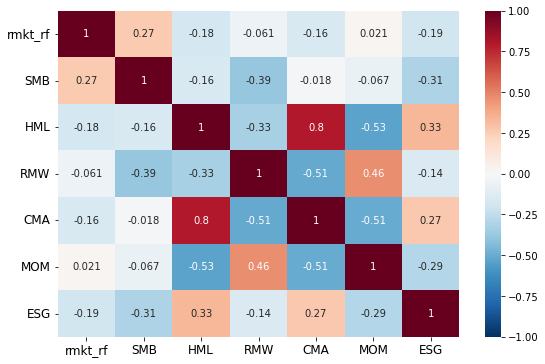

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


data = x_corr
f, ax = plt.subplots(figsize=(9,6))

ax = sns.heatmap(data,cmap = "RdBu_r",ax=ax,vmin=-1, vmax=1,annot=True,fmt ='0.2g')

#设置坐标字体方向
ax.set_yticklabels(ax.get_yticklabels(),fontsize=12, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12, rotation=0)
plt.show()


In [60]:
import statsmodels.api as sm

In [80]:
#对ESG因子进行回归检验

lhs = x['ESG']
rhs = x.iloc[:,np.r_[0:5,6]]
model = sm.OLS(lhs,rhs)
results = model.fit()

In [86]:
#对CMA/HML因子进行回归检验

lhs = x['HML']
rhs = x.iloc[:,np.r_[0:3,4:8]]
model = sm.OLS(lhs,rhs)
results = model.fit()

In [81]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESG   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4.402
Date:                Sun, 27 Mar 2022   Prob (F-statistic):            0.00149
Time:                        23:42:53   Log-Likelihood:                 196.13
No. Observations:                  78   AIC:                            -380.3
Df Residuals:                      72   BIC:                            -366.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.003      0.460      0.6

多因子回归检验

In [148]:
reg

,ESG1-Size1,ESG1-Size2,ESG1-Size3,ESG1-Size4,ESG1-Size5,ESG2-Size1,ESG2-Size2,ESG2-Size3,ESG2-Size4,ESG2-Size5,...,rf,rmkt_rf,tradedate,SMB,HML,RMW,CMA,MOM,ESG,Intercept
0,-0.526601,-0.402178,-0.426024,-0.361811,-0.377431,-0.361548,-0.422489,-0.405481,-0.446491,-0.420800,...,0.2711,-0.413579,201507,-0.024696,-0.014311,0.001714,-0.008219,-0.040254,0.010299,1
1,-0.204540,-0.117085,-0.178588,-0.212738,-0.131936,-0.195893,-0.125402,-0.160075,-0.177455,-0.146152,...,0.0272,-0.154195,201508,-0.007916,0.025738,0.004247,0.034630,-0.019166,0.025593,1
2,-0.140765,-0.096877,-0.075000,-0.118893,-0.080557,-0.067790,-0.059272,-0.103913,-0.087676,-0.093854,...,0.0230,-0.077690,201509,-0.021568,-0.002217,0.073645,-0.041929,-0.009662,0.018780,1
3,0.073348,0.146360,0.088466,0.097559,0.086568,0.171826,0.134836,0.169102,0.151453,0.101381,...,0.0081,0.110640,201510,0.064928,-0.092518,-0.012129,-0.049728,0.075212,-0.032273,1
4,-0.084132,-0.151256,-0.054251,-0.095961,-0.163110,-0.008176,-0.038275,-0.056918,-0.079446,-0.077863,...,0.0925,-0.072524,201511,0.033030,0.009029,0.073292,-0.055080,-0.011757,0.006557,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.104132,NaN,-0.252033,-0.032847,-0.085643,0.003462,0.035460,-0.042637,-0.114137,-0.042645,...,0.1469,-0.130733,202108,0.056468,0.105498,-0.012029,0.052791,0.113511,-0.028384,1
74,0.003470,NaN,-0.014799,0.012143,0.088294,0.017436,-0.040190,-0.008725,0.028045,-0.012293,...,0.0209,-0.016648,202109,-0.025167,0.028551,-0.000959,0.023760,-0.047551,-0.010509,1
75,0.002489,NaN,0.029757,-0.097625,-0.056245,0.060669,0.020719,0.027617,0.016723,-0.035774,...,-0.0253,0.029104,202110,-0.015466,-0.079237,-0.026258,-0.046737,0.005408,0.044298,1
76,0.097702,NaN,0.028917,0.023369,-0.061306,0.076177,0.084093,0.084625,0.061318,0.070138,...,-0.0304,0.026408,202111,0.052616,-0.057778,-0.021558,-0.033364,-0.022631,-0.031608,1


In [124]:
x=reg.iloc[:, np.r_[36,28,30:32,35]]
x

,Intercept,rmkt_rf,SMB,HML,ESG
0,1,-0.413579,-0.024696,-0.014311,0.010299
1,1,-0.154195,-0.007916,0.025738,0.025593
2,1,-0.077690,-0.021568,-0.002217,0.018780
3,1,0.110640,0.064928,-0.092518,-0.032273
4,1,-0.072524,0.033030,0.009029,0.006557
...,...,...,...,...,...
73,1,-0.130733,0.056468,0.105498,-0.028384
74,1,-0.016648,-0.025167,0.028551,-0.010509
75,1,0.029104,-0.015466,-0.079237,0.044298
76,1,0.026408,0.052616,-0.057778,-0.031608


In [125]:
inds_port = pd.read_excel('行业组合.xlsx')
inds_port = inds_port.iloc[:,1:]
inds_port

,交通运输、仓储和邮政业,住宿和餐饮业,信息传输、软件和信息技术服务业,农、林、牧、渔业,制造业,卫生和社会工作,建筑业,房地产业,批发和零售业,教育,文化、体育和娱乐业,水利、环境和公共设施管理业,电力、热力、燃气及水生产和供应业,科学研究和技术服务业,租赁和商务服务业,采矿业,金融业,综合
0,-0.189696,-0.151725,-0.163729,-0.115630,-0.137601,-0.113633,-0.103516,-0.139960,-0.177579,-0.213490,-0.060894,-0.102401,-0.187227,-0.107565,-0.111771,-0.103206,-0.108980,-0.211461
1,-0.042823,-0.116036,-0.184017,-0.144041,-0.112523,-0.181226,-0.109588,-0.107632,-0.069233,0.122543,-0.147213,-0.117089,-0.093917,-0.158395,-0.161282,-0.164235,-0.121818,-0.119788
2,-0.057430,-0.085637,0.025617,-0.061461,-0.052075,0.057211,-0.055354,-0.063059,-0.029369,0.048345,0.018377,-0.016112,-0.092728,0.017756,-0.022624,-0.065806,-0.008861,-0.073754
3,0.141794,0.278390,0.293033,0.160057,0.188613,0.137045,0.156612,0.189215,0.222633,0.287942,0.138697,0.238511,0.144340,0.156256,0.126755,0.083984,0.087689,0.309438
4,-0.036698,0.181275,0.108103,0.079539,0.078099,0.039104,-0.014361,0.077958,0.033939,0.314469,0.183906,0.089138,0.003785,0.077406,0.068310,-0.019032,0.056357,0.247109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.072031,0.169881,0.004986,0.006296,0.078550,-0.226038,0.128049,0.076679,0.068608,-0.004023,0.038149,0.117291,0.123051,-0.045166,-0.013648,0.174265,0.043181,0.285830
74,0.051672,-0.021330,0.009951,0.128232,-0.010636,0.195525,0.039871,0.106241,-0.001381,-0.020288,0.014535,0.051602,0.250787,0.109864,0.067702,0.092950,0.012954,-0.113335
75,-0.012254,0.134397,0.010898,0.055704,0.032909,-0.063660,-0.039936,-0.080634,-0.005505,-0.016771,-0.033302,-0.088069,-0.079346,-0.056930,0.027111,-0.085110,0.005194,0.083224
76,-0.021079,-0.035875,0.084438,-0.011470,0.065141,-0.077263,0.005714,0.030492,0.024130,0.008183,0.053628,0.117644,-0.037209,0.029701,-0.078370,-0.051954,-0.019453,-0.012775


In [126]:
for column in inds_port.columns:
    inds_port[column]= inds_port[column] - rf
inds_port

,交通运输、仓储和邮政业,住宿和餐饮业,信息传输、软件和信息技术服务业,农、林、牧、渔业,制造业,卫生和社会工作,建筑业,房地产业,批发和零售业,教育,文化、体育和娱乐业,水利、环境和公共设施管理业,电力、热力、燃气及水生产和供应业,科学研究和技术服务业,租赁和商务服务业,采矿业,金融业,综合
0,-0.460796,-0.422825,-0.434829,-0.386730,-0.408701,-0.384733,-0.374616,-0.411060,-0.448679,-0.484590,-0.331994,-0.373501,-0.458327,-0.378665,-0.382871,-0.374306,-0.380080,-0.482561
1,-0.070023,-0.143236,-0.211217,-0.171241,-0.139723,-0.208426,-0.136788,-0.134832,-0.096433,0.095343,-0.174413,-0.144289,-0.121117,-0.185595,-0.188482,-0.191435,-0.149018,-0.146988
2,-0.080430,-0.108637,0.002617,-0.084461,-0.075075,0.034211,-0.078354,-0.086059,-0.052369,0.025345,-0.004623,-0.039112,-0.115728,-0.005244,-0.045624,-0.088806,-0.031861,-0.096754
3,0.133694,0.270290,0.284933,0.151957,0.180513,0.128945,0.148512,0.181115,0.214533,0.279842,0.130597,0.230411,0.136240,0.148156,0.118655,0.075884,0.079589,0.301338
4,-0.129198,0.088775,0.015603,-0.012961,-0.014401,-0.053396,-0.106861,-0.014542,-0.058561,0.221969,0.091406,-0.003362,-0.088715,-0.015094,-0.024190,-0.111532,-0.036143,0.154609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.074869,0.022981,-0.141914,-0.140604,-0.068350,-0.372938,-0.018851,-0.070221,-0.078292,-0.150923,-0.108751,-0.029609,-0.023849,-0.192066,-0.160548,0.027365,-0.103719,0.138930
74,0.030772,-0.042230,-0.010949,0.107332,-0.031536,0.174625,0.018971,0.085341,-0.022281,-0.041188,-0.006365,0.030702,0.229887,0.088964,0.046802,0.072050,-0.007946,-0.134235
75,0.013046,0.159697,0.036198,0.081004,0.058209,-0.038360,-0.014636,-0.055334,0.019795,0.008529,-0.008002,-0.062769,-0.054046,-0.031630,0.052411,-0.059810,0.030494,0.108524
76,0.009321,-0.005475,0.114838,0.018930,0.095541,-0.046863,0.036114,0.060892,0.054530,0.038583,0.084028,0.148044,-0.006809,0.060101,-0.047970,-0.021554,0.010947,0.017625


In [116]:
import statsmodels.api as sm
#五因子行业回归

r2=[]
betas=[]
t=[]
p=[]
e=[]

for i in range(18):
    y=inds_port.iloc[:,i]
    mod=sm.OLS(y,x).fit()
    
    r2.append([inds_port.columns[i],mod.rsquared_adj])
    betas.append([inds_port.columns[i]]+list(mod.params))
    t.append([inds_port.columns[i]]+list(mod.tvalues))
    p.append([inds_port.columns[i]]+list(mod.pvalues))
    e.append([inds_port.columns[i]]+list(mod.resid))
    
p=pd.DataFrame(p,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM','ESG'])
t=pd.DataFrame(t,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM','ESG'])
betas=pd.DataFrame(betas,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM','ESG'])
r2=pd.DataFrame(r2,columns=['group','r2'])

In [127]:
import statsmodels.api as sm
#三因子行业回归

r2=[]
betas=[]
t=[]
p=[]
e=[]

for i in range(18):
    y=inds_port.iloc[:,i]
    mod=sm.OLS(y,x).fit()
    
    r2.append([inds_port.columns[i],mod.rsquared_adj])
    betas.append([inds_port.columns[i]]+list(mod.params))
    t.append([inds_port.columns[i]]+list(mod.tvalues))
    p.append([inds_port.columns[i]]+list(mod.pvalues))
    e.append([inds_port.columns[i]]+list(mod.resid))
    
p=pd.DataFrame(p,columns=['group','Intercept','mkt_rf','SMB','HML','ESG'])
t=pd.DataFrame(t,columns=['group','Intercept','mkt_rf','SMB','HML','ESG'])
betas=pd.DataFrame(betas,columns=['group','Intercept','mkt_rf','SMB','HML','ESG'])
r2=pd.DataFrame(r2,columns=['group','r2'])

In [207]:
import statsmodels.api as sm
#五因子加入ESG回归

r2=[]
betas=[]
t=[]
p=[]
e=[]

for i in range(25):
    y=reg.loc[:,f25.columns[i]]
    mod=sm.OLS(y,x).fit()
    
    r2.append([f25.columns[i],mod.rsquared])
    betas.append([f25.columns[i]]+list(mod.params))
    t.append([f25.columns[i]]+list(mod.tvalues))
    p.append([f25.columns[i]]+list(mod.pvalues))
    e.append([f25.columns[i]]+list(mod.resid))
    
p=pd.DataFrame(p,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM','ESG'])
t=pd.DataFrame(t,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM','ESG'])
betas=pd.DataFrame(betas,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM','ESG'])
r2=pd.DataFrame(r2,columns=['group','r2'])

In [211]:
import statsmodels.api as sm
#五因子不加ESG回归

r2=[]
betas=[]
t=[]
p=[]
e=[]

for i in range(25):
    y=reg.loc[:,f25.columns[i]]
    mod=sm.OLS(y,x).fit()
    
    r2.append([f25.columns[i],mod.rsquared])
    betas.append([f25.columns[i]]+list(mod.params))
    t.append([f25.columns[i]]+list(mod.tvalues))
    p.append([f25.columns[i]]+list(mod.pvalues))
    e.append([f25.columns[i]]+list(mod.resid))
    
p=pd.DataFrame(p,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM'])
t=pd.DataFrame(t,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM'])
betas=pd.DataFrame(betas,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','MOM'])
r2=pd.DataFrame(r2,columns=['group','r2'])

In [203]:
import statsmodels.api as sm
#三因子加入ESG回归

r2=[]
betas=[]
t=[]
p=[]
e=[]

for i in range(25):
    y=reg.loc[:,f25.columns[i]]
    mod=sm.OLS(y,x).fit()
    
    r2.append([f25.columns[i],mod.rsquared])
    betas.append([f25.columns[i]]+list(mod.params))
    t.append([f25.columns[i]]+list(mod.tvalues))
    p.append([f25.columns[i]]+list(mod.pvalues))
    e.append([f25.columns[i]]+list(mod.resid))
    
p=pd.DataFrame(p,columns=['group','Intercept','mkt_rf','SMB','HML','ESG'])
t=pd.DataFrame(t,columns=['group','Intercept','mkt_rf','SMB','HML','ESG'])
betas=pd.DataFrame(betas,columns=['group','Intercept','mkt_rf','SMB','HML','ESG'])
r2=pd.DataFrame(r2,columns=['group','r2'])

In [185]:
import statsmodels.api as sm
#三因子不加ESG回归

r2=[]
betas=[]
t=[]
p=[]
e=[]

for i in range(25):
    y=reg.loc[:,f25.columns[i]]
    mod=sm.OLS(y,x).fit()
    
    r2.append([f25.columns[i],mod.rsquared])
    betas.append([f25.columns[i]]+list(mod.params))
    t.append([f25.columns[i]]+list(mod.tvalues))
    p.append([f25.columns[i]]+list(mod.pvalues))
    e.append([f25.columns[i]]+list(mod.resid))
    
p=pd.DataFrame(p,columns=['group','Intercept','mkt_rf','SMB','HML'])
t=pd.DataFrame(t,columns=['group','Intercept','mkt_rf','SMB','HML'])
betas=pd.DataFrame(betas,columns=['group','Intercept','mkt_rf','SMB','HML'])
r2=pd.DataFrame(r2,columns=['group','r2'])

In [128]:
betas

,group,Intercept,mkt_rf,SMB,HML,ESG
0,交通运输、仓储和邮政业,0.007219,1.002016,0.099879,0.214606,-0.188369
1,住宿和餐饮业,0.011456,1.048135,0.593949,0.156856,-0.610844
2,信息传输、软件和信息技术服务业,0.006930,1.024680,1.012916,-0.205482,-0.010368
3,农、林、牧、渔业,0.011127,1.006534,0.085360,0.053484,-0.884677
4,制造业,0.015425,0.982653,0.522473,-0.197665,0.092229
5,卫生和社会工作,0.001020,0.964818,-0.520687,-0.637673,-0.181308
6,建筑业,0.012269,1.014438,0.445015,0.550990,-0.167609
7,房地产业,0.012543,1.017441,0.094666,0.557745,-1.111449
8,批发和零售业,0.003920,0.929601,0.577521,0.023205,-0.311541
9,教育,-0.002659,0.891601,0.497667,-0.223853,-0.645071


In [129]:
p

,group,Intercept,mkt_rf,SMB,HML,ESG
0,交通运输、仓储和邮政业,3.067475e-02,2.493226e-49,3.315834e-01,3.700341e-04,2.177486e-01
1,住宿和餐饮业,1.484477e-01,4.620169e-26,1.768646e-02,2.580831e-01,9.654604e-02
2,信息传输、软件和信息技术服务业,1.436209e-01,2.108320e-39,1.425683e-09,1.471782e-02,9.619917e-01
3,农、林、牧、渔业,1.512109e-01,1.315012e-25,7.223734e-01,6.922378e-01,1.493261e-02
4,制造业,3.006424e-13,2.721104e-68,1.131240e-14,8.944045e-09,2.543000e-01
5,卫生和社会工作,8.894629e-01,9.519830e-26,2.537189e-02,4.267347e-06,5.935549e-01
6,建筑业,3.751562e-03,4.989101e-43,8.454011e-04,5.974590e-11,3.793870e-01
7,房地产业,1.511962e-03,2.635169e-45,4.276868e-01,3.010705e-12,1.880147e-08
8,批发和零售业,2.703478e-01,7.393451e-45,1.462685e-06,7.088781e-01,6.025113e-02
9,教育,7.898311e-01,4.541819e-17,1.128499e-01,2.033261e-01,1.648728e-01


In [120]:
betas.to_excel('.//new_result//行业betas.xlsx')

In [121]:
t.to_excel('.//new_result//行业t.xlsx')

In [122]:
p.to_excel('.//new_result//行业p.xlsx')

In [123]:
r2.to_excel('.//new_result//行业r2.xlsx')

In [213]:
r2.dropna().mean()

C:\Users\olivia\AppData\Local\Temp/ipykernel_12636/2387391998.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  r2.dropna().mean()


r2    0.941046
dtype: float64

In [186]:
print(mod.summary() )

                            OLS Regression Results                            
Dep. Variable:             ESG5-Size5   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     870.4
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           1.33e-57
Time:                        22:48:05   Log-Likelihood:                 198.21
No. Observations:                  78   AIC:                            -388.4
Df Residuals:                      74   BIC:                            -379.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0123      0.002      5.200      0.0

In [170]:
beta = betas['ESG']
beta = pd.DataFrame(beta.values.reshape(5,5))
beta.to_excel('.\\new_result\\beta\Beta_ESG2.xlsx')

In [171]:
p_value = p['ESG']
p_value = pd.DataFrame(p_value.values.reshape(5,5))
p_value.to_excel('.\\new_result\p\P_ESG2.xlsx')

In [187]:
alpha = betas['Intercept']
alpha.to_csv('.//new_result//alpha4.csv')

In [188]:
e = pd.DataFrame(e)
e.T.to_csv('.//new_result//e4.csv')

In [175]:
alpha = betas['Intercept']
abs(alpha).mean()

0.008678036475209832

In [ ]:
#进行GRS检验

In [190]:
e = pd.read_csv('.//new_result//e4.csv')
resid=pd.DataFrame(e)
resid = resid.dropna(axis=1)
resid = resid.astype('float64')
resid = np.matrix(resid)
np.shape(resid)

(78, 21)

In [191]:
alpha = pd.read_csv('.//new_result//alpha2.csv')
alpha = np.matrix(alpha.astype('float64'))
np.shape(alpha)

(21, 1)

In [192]:
factors = ff5.iloc[:,np.r_[3,5,6]]
factors

,rmkt_rf,SMB,HML
0,-0.413579,-0.024696,-0.014311
1,-0.154195,-0.007916,0.025738
2,-0.077690,-0.021568,-0.002217
3,0.110640,0.064928,-0.092518
4,-0.072524,0.033030,0.009029
...,...,...,...
73,-0.130733,0.056468,0.105498
74,-0.016648,-0.025167,0.028551
75,0.029104,-0.015466,-0.079237
76,0.026408,0.052616,-0.057778


In [193]:
factors = np.matrix(factors.astype('float64'))
np.shape(factors)

(78, 3)

In [133]:
"""
Function GRS_test(factor, resid, alpha) is to conduct GRS test according 
to Gibbons, Ross & Shanken(1989) to receive GRS-statistic and p-value.

H0: alpha1=alpha2=...=alphaN

Parameters:
  T = number of months
  N = number of portfolios
  L = number of factors

Inputs:
  factor: matrix of FF factors with shape (T, L)
  resid: matrix of residuals with shape (T, N)
  alpha: matrix of intercepts with shape (N, 1)

Outputs:
  f_grs: GRS-statistic
  p_grs: P-value

"""

def GRS_test(factor, resid, alpha):
    N = resid.shape[1]        
    T = resid.shape[0]       
    L = factor.shape[1]      

    if (T-N-L) < 0:
        print('can not conduct GRS test because T-N-L<0')
        return

    factor = np.asmatrix(factor)                   # factor matrix (T, L)
    resid = np.asmatrix(resid)                     # residual matrix (T, N)
    alpha = np.asmatrix(alpha).reshape(N, 1)       # intercept matrix (N, 1)

    mean_return_factor = (factor.mean(axis=0))

    # covariance matrix of residuals
    cov_resid = (resid.T * resid) / (T-L-1)
    # covariance matrix of factors
    cov_factor = ((factor - mean_return_factor).T * (factor - mean_return_factor)) / (T-1)

    mean_return_factor = mean_return_factor.reshape(L, 1)

    # GRS statistic
    f_grs = float((T/N) * ((T-N-L)/(T-L-1)) * ((alpha.T * np.linalg.inv(cov_resid) * alpha) / (1 + mean_return_factor.T * np.linalg.inv(cov_factor) * mean_return_factor)))

    # p-value
    p_grs = 1 - st.f.cdf(f_grs, N, (T-N-L))

    return f_grs, p_grs

In [194]:
import scipy.stats as st
grs = GRS_test(factors, resid, alpha)
grs

(4.354312108791234, 6.652804451445782e-06)

In [ ]:
#分行业回归

In [59]:
stock = pd.read_excel('股票行业.xlsx',converters = {u'code':str})
stock

,code,time,close,mc,return,industry
0,000001,2014-06,9.91,6.630839e+07,0.048286,金融业
1,000001,2014-07,10.87,7.273181e+07,0.096872,金融业
2,000001,2014-08,10.25,6.858383e+07,-0.057038,金融业
3,000001,2014-09,10.14,9.974426e+07,-0.010732,金融业
4,000001,2014-10,11.03,1.084989e+08,0.087771,金融业
...,...,...,...,...,...,...
306007,689009,2021-09,80.90,4.898648e+05,0.078667,制造业
306008,689009,2021-10,64.00,2.835167e+06,-0.208900,制造业
306009,689009,2021-11,60.84,2.695180e+06,-0.049375,制造业
306010,689009,2021-12,70.07,3.104065e+06,0.151709,制造业


In [60]:
stock = stock.dropna(how = 'any')

In [102]:
avereturn = stock.groupby(by=['industry','time'])['return'].mean()

In [103]:
avereturn.to_excel('indsavereturn2.xlsx')

In [261]:
import os
inds_list = []
for a,b, files in os.walk('.//industry'):
    inds_list = files

In [265]:
import re

for i in range(len(inds_list)):
    df_inds = pd.read_excel(".//industry//{}".format(inds_list[i]))
    inds_name = re.findall('(.*?).xlsx',inds_list[i])
    for j in range(len(df_inds)):
        df_inds.iloc[j,0] = df_inds.iloc[j,0][:6]
    for n in range(len(stock)):
        if stock.loc[n,'code'] in df_inds['证券代码'].values:
            stock.loc[n,'industry'] = inds_name

In [269]:
stock['industry'].value_counts()

制造业                 188639
信息传输、软件和信息技术服务业      23666
批发和零售业               13934
房地产业                  9942
电力、热力、燃气及水生产和供应业      9789
金融业                   8892
交通运输、仓储和邮政业           8201
建筑业                   7689
采矿业                   6413
水利、环境和公共设施管理业         5080
租赁和商务服务业              4786
文化、体育和娱乐业             4404
科学研究和技术服务业            3704
农、林、牧、渔业              3610
0                     3491
综合                    1137
卫生和社会工作               1073
教育                     865
住宿和餐饮业                 648
居民服务、修理和其他服务业           49
Name: industry, dtype: int64

In [270]:
stock.to_excel('股票行业.xlsx')

In [237]:
for i in range(len(df_inds)):
    df_inds.iloc[i,0] = df_inds.iloc[i,0][:6]
df_inds

,证券代码,证券简称
0,000088,盐田港
1,000089,深圳机场
2,000099,中信海直
3,000429,粤高速A
4,000507,珠海港
...,...,...
111,605050,福然德
112,900903,大众B股
113,900914,锦在线B
114,900945,*ST海航B


In [240]:
import re
inds_name = re.findall('(.*?).xlsx',inds_list[0])
inds_name

['交通运输、仓储和邮政业']

In [256]:
for i in range(len(stock)):
    if stock.loc[i,'code'] in df_inds['证券代码'].values:
        stock.loc[i,'industry'] = inds_name
stock

,code,time,close,mc,return,industry
0,000001,2014-06,9.91,6.630839e+07,0.048286,NaN
1,000001,2014-07,10.87,7.273181e+07,0.096872,NaN
2,000001,2014-08,10.25,6.858383e+07,-0.057038,NaN
3,000001,2014-09,10.14,9.974426e+07,-0.010732,NaN
4,000001,2014-10,11.03,1.084989e+08,0.087771,NaN
...,...,...,...,...,...,...
306007,689009,2021-09,80.90,4.898648e+05,0.078667,NaN
306008,689009,2021-10,64.00,2.835167e+06,-0.208900,NaN
306009,689009,2021-11,60.84,2.695180e+06,-0.049375,NaN
306010,689009,2021-12,70.07,3.104065e+06,0.151709,NaN


In [258]:
stock['industry'].value_counts()

交通运输、仓储和邮政业    8201
Name: industry, dtype: int64

In [ ]:
#BM OP INV MOM

In [571]:
#第二/三组回归
LHS['group2']=LHS.apply(lambda x:'BM'+str(int(x['g_BM']))+'-'+'Size'+str(int(x['g_SIZE'])),axis=1)
#在每一个时间点将25个组合内部的各支股票收益率用市值加权计算组合的收益率
f25_BM=LHS.groupby(['date','group2']).apply(lambda x: (x.loc[:,'return']*x.loc[:,'mc']).sum()/x.loc[:,'mc'].sum())
f25_BM=f25_BM.unstack()

f25_BM

group2,BM1-Size1,BM1-Size2,BM1-Size3,BM1-Size4,BM1-Size5,BM2-Size1,BM2-Size2,BM2-Size3,BM2-Size4,BM2-Size5,...,BM4-Size1,BM4-Size2,BM4-Size3,BM4-Size4,BM4-Size5,BM5-Size1,BM5-Size2,BM5-Size3,BM5-Size4,BM5-Size5
date,,,,,,,,,,,,,,,,,,,,,
201501,0.175256,0.079995,0.156906,0.144614,0.132534,0.075703,0.052531,0.038735,-0.001387,0.136247,...,0.002263,0.005317,0.050152,-0.055176,-0.044742,-0.080336,-0.031613,-0.043425,-0.063032,-0.036847
201502,0.052290,0.028994,0.096197,0.125542,0.060653,0.050061,0.089696,0.102569,0.125273,0.033311,...,-0.001485,0.030763,0.048420,0.051390,0.038376,0.026076,0.032061,0.017749,0.007766,-0.001832
201503,0.263057,0.140500,0.119801,0.186271,0.188929,0.182618,0.098264,0.085680,0.156858,0.150940,...,0.157104,0.162386,0.188655,0.162750,0.135432,0.106734,0.146440,0.189589,0.149703,0.077656
201504,0.034930,0.189287,0.136621,0.363245,0.125142,0.094855,0.069471,0.108541,0.484160,0.462425,...,0.133473,0.133125,0.277089,0.222000,0.245764,0.154994,0.088008,0.143449,0.197734,0.161048
201505,0.201357,0.127944,0.203745,0.250453,0.204260,0.062933,0.201085,0.124020,0.093169,0.061492,...,0.192683,-0.011073,0.083881,0.069002,-0.077372,-0.031809,-0.033798,-0.026603,0.047293,-0.082496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,-0.050991,-0.050781,-0.051184,-0.030345,-0.011669,0.074771,0.088973,0.049344,0.058024,0.027362,...,0.170464,0.150908,0.132819,0.200795,0.084882,0.070830,0.130049,0.086522,0.149315,0.050392
202109,0.048630,0.021004,0.008660,0.001481,0.054898,0.052218,-0.036263,-0.009603,-0.047657,-0.024076,...,-0.006774,-0.002334,0.054719,0.000995,0.000119,0.201241,0.041191,0.088489,0.124178,0.045322
202110,-0.007198,-0.018522,-0.029245,0.067472,0.042291,0.003476,0.034184,0.005830,0.039701,0.016774,...,-0.012786,-0.057208,-0.034727,-0.049824,-0.009210,-0.043895,-0.096199,-0.082740,-0.082569,-0.024140


In [572]:
#第二/三组回归
LHS['group3']=LHS.apply(lambda x:'OP'+str(int(x['g_OP']))+'-'+'Size'+str(int(x['g_SIZE'])),axis=1)
#在每一个时间点将25个组合内部的各支股票收益率用市值加权计算组合的收益率
f25_OP=LHS.groupby(['date','group3']).apply(lambda x: (x.loc[:,'return']*x.loc[:,'mc']).sum()/x.loc[:,'mc'].sum())
f25_OP=f25_OP.unstack()

f25_OP

group3,OP1-Size1,OP1-Size2,OP1-Size3,OP1-Size4,OP1-Size5,OP2-Size1,OP2-Size2,OP2-Size3,OP2-Size4,OP2-Size5,...,OP4-Size1,OP4-Size2,OP4-Size3,OP4-Size4,OP4-Size5,OP5-Size1,OP5-Size2,OP5-Size3,OP5-Size4,OP5-Size5
date,,,,,,,,,,,,,,,,,,,,,
201501,0.115435,-0.028043,0.054743,0.048374,-0.022025,0.066950,0.030600,0.017372,-0.009309,0.056199,...,0.076512,0.037922,0.114575,-0.024714,-0.048940,0.038176,0.105307,-0.054178,0.013358,-0.047207
201502,0.018688,0.052158,0.027312,0.045048,0.021716,0.050631,0.062640,0.097129,0.044151,0.006272,...,0.038682,0.021581,0.065153,0.122871,-0.007339,0.080913,0.001599,0.069537,0.084652,0.043447
201503,0.192896,0.152303,0.114214,0.169526,0.115939,0.134736,0.158301,0.061853,0.140860,0.053380,...,0.186597,0.152050,0.200947,0.152034,0.100038,0.303734,0.124945,0.174645,0.107906,0.063774
201504,0.050887,0.149685,0.202220,0.409293,0.529219,0.109505,0.155805,0.135465,0.231250,0.187405,...,0.167891,0.091984,0.081369,0.145945,0.135213,0.038704,0.141464,0.130028,0.292259,0.132705
201505,0.100581,0.072969,0.067718,0.146566,0.084734,0.084862,0.020747,0.080568,0.140803,-0.085693,...,0.112909,0.058865,0.156454,0.115128,-0.072041,0.110919,0.053188,0.051967,0.028814,-0.020545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,0.098073,0.102984,0.062348,0.102625,0.051031,0.092510,0.115552,0.069497,0.098631,0.034552,...,0.126553,0.102623,0.044271,0.087784,0.066028,0.098488,0.175363,0.109938,0.063017,-0.008076
202109,0.012116,0.033768,-0.008827,0.063995,-0.002749,0.055810,0.020670,0.038550,0.040368,0.003752,...,0.018676,-0.012764,0.036228,-0.016650,0.000940,0.007800,-0.026360,-0.039629,-0.014491,0.080184
202110,0.017027,-0.034070,0.002993,0.019999,0.056008,-0.029285,0.014431,-0.016342,0.003116,-0.007943,...,-0.030764,-0.038166,-0.020519,0.036709,0.013388,-0.060277,-0.066773,-0.051794,-0.015114,0.014819


In [573]:
#第二/三组回归
LHS['group4']=LHS.apply(lambda x:'INV'+str(int(x['g_INV']))+'-'+'Size'+str(int(x['g_SIZE'])),axis=1)
#在每一个时间点将25个组合内部的各支股票收益率用市值加权计算组合的收益率
f25_INV=LHS.groupby(['date','group4']).apply(lambda x: (x.loc[:,'return']*x.loc[:,'mc']).sum()/x.loc[:,'mc'].sum())
f25_INV=f25_INV.unstack()

f25_INV

group4,INV1-Size1,INV1-Size2,INV1-Size3,INV1-Size4,INV1-Size5,INV2-Size1,INV2-Size2,INV2-Size3,INV2-Size4,INV2-Size5,...,INV4-Size1,INV4-Size2,INV4-Size3,INV4-Size4,INV4-Size5,INV5-Size1,INV5-Size2,INV5-Size3,INV5-Size4,INV5-Size5
date,,,,,,,,,,,,,,,,,,,,,
201501,0.072443,-0.080746,0.016180,-0.059427,0.033734,0.092027,0.006377,0.083465,-0.010683,-0.040176,...,0.022173,0.073317,0.138518,0.032109,-0.024997,0.109053,0.092788,-0.001693,0.024909,-0.030144
201502,0.029200,0.061305,0.043371,0.032262,-0.010257,0.033495,0.025932,-0.016450,-0.002213,0.006535,...,0.054405,0.058642,0.055418,0.083069,0.024215,0.133478,0.101094,0.124402,0.130750,0.065168
201503,0.160438,0.136366,0.157988,0.190553,0.053091,0.139726,0.167984,0.159448,0.208708,0.095267,...,0.227492,0.118044,0.192821,0.158807,0.109242,0.176879,0.136740,0.064904,0.125891,0.179314
201504,0.084664,0.225583,0.198021,0.161609,0.223330,0.090576,0.071123,0.205389,0.485566,0.286828,...,0.086761,0.125206,0.097291,0.092969,0.149375,0.069826,0.132318,0.135735,0.284486,0.243482
201505,0.074216,-0.038658,0.058074,0.109063,-0.064584,0.079336,-0.015780,0.070571,0.134738,-0.073641,...,0.160709,0.154207,0.182951,0.079923,-0.046825,0.122555,0.224235,0.080423,0.036621,-0.033063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,0.120497,0.161365,0.114300,0.068189,0.039529,0.103497,0.136922,0.098325,0.099479,0.059915,...,0.061468,0.106531,-0.035902,0.106349,-0.002047,0.014255,0.029178,0.047222,0.017310,0.041474
202109,0.034079,0.007807,0.012873,0.023528,0.131651,0.006447,-0.016793,0.026027,0.015474,-0.003589,...,0.276182,-0.003852,-0.013385,-0.003515,0.075555,0.023009,0.055704,0.024120,-0.014430,0.020146
202110,-0.031736,-0.038208,-0.021416,-0.022657,-0.050795,-0.045023,-0.077396,-0.040467,0.011929,-0.006403,...,-0.008160,-0.017061,-0.023366,-0.033330,0.010019,0.069337,0.003784,0.004887,0.061350,0.036034


In [574]:
#第二/三组回归
LHS['group5']=LHS.apply(lambda x:'MOM'+str(int(x['g_MOM']))+'-'+'Size'+str(int(x['g_SIZE'])),axis=1)
#在每一个时间点将25个组合内部的各支股票收益率用市值加权计算组合的收益率
f25_MOM=LHS.groupby(['date','group5']).apply(lambda x: (x.loc[:,'return']*x.loc[:,'mc']).sum()/x.loc[:,'mc'].sum())
f25_MOM=f25_MOM.unstack()

f25_MOM

group5,MOM1-Size1,MOM1-Size2,MOM1-Size3,MOM1-Size4,MOM1-Size5,MOM2-Size1,MOM2-Size2,MOM2-Size3,MOM2-Size4,MOM2-Size5,...,MOM4-Size1,MOM4-Size2,MOM4-Size3,MOM4-Size4,MOM4-Size5,MOM5-Size1,MOM5-Size2,MOM5-Size3,MOM5-Size4,MOM5-Size5
date,,,,,,,,,,,,,,,,,,,,,
201501,0.165313,0.084892,0.057233,-0.031979,-0.057304,0.024161,-0.032264,0.087079,0.002913,0.000387,...,0.079669,0.038224,0.000122,0.002798,-0.041043,0.076175,0.017846,0.053854,0.060343,0.024904
201502,0.060285,0.005597,0.096979,0.047324,0.005327,0.017239,0.010127,0.090379,0.063275,-0.013916,...,0.034245,0.076232,0.020722,0.090456,0.071180,0.068717,0.020038,0.117087,0.104416,0.041002
201503,0.232387,0.143155,0.029121,0.162256,0.066490,0.117457,0.143481,0.193342,0.111005,0.061330,...,0.181308,0.132537,0.171454,0.161780,0.086867,0.197779,0.202556,0.161376,0.160423,0.249997
201504,0.022940,0.089460,0.081491,0.094251,0.138990,0.110490,0.126042,0.112989,0.133923,0.131901,...,0.204996,0.085554,0.199638,0.189589,0.156634,0.072425,0.202645,0.242378,0.494628,0.486163
201505,0.182417,0.036820,0.088741,0.043822,-0.071690,0.083941,0.019170,0.155380,-0.003998,-0.065541,...,0.163554,0.114028,0.074498,0.097633,-0.049500,0.172995,0.079675,0.138843,0.208976,-0.029853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,0.055167,-0.001414,-0.047914,-0.067027,-0.065766,0.036722,0.101977,0.033153,0.041682,0.020606,...,0.177823,0.204103,0.182949,0.074314,0.060837,0.070462,0.235847,0.127585,0.152020,0.029136
202109,0.150480,-0.015211,0.056733,0.067622,0.034935,0.025466,0.067483,0.048418,0.015171,0.034725,...,0.056259,-0.024975,-0.018953,0.022786,0.026209,0.111853,0.006834,-0.046717,-0.062478,0.032899
202110,0.014184,-0.005676,-0.001186,0.018693,0.060716,-0.037406,-0.031605,-0.024861,-0.025647,-0.019551,...,-0.065288,-0.025362,-0.029262,0.039198,0.017640,-0.066601,-0.017683,-0.015611,0.004325,0.035170


In [669]:
#f252 = pd.concat([f25_BM,f25_OP,f25_INV,f25_MOM],axis=1)
f252 = f25_BM
f252 = f252.iloc[6:,:]
f252

group2,BM1-Size1,BM1-Size2,BM1-Size3,BM1-Size4,BM1-Size5,BM2-Size1,BM2-Size2,BM2-Size3,BM2-Size4,BM2-Size5,...,BM4-Size1,BM4-Size2,BM4-Size3,BM4-Size4,BM4-Size5,BM5-Size1,BM5-Size2,BM5-Size3,BM5-Size4,BM5-Size5
date,,,,,,,,,,,,,,,,,,,,,
201507,-0.003862,-0.126861,-0.088533,-0.067529,-0.166908,-0.168319,-0.099404,-0.181527,-0.129441,-0.137551,...,-0.083523,-0.240060,-0.166812,-0.179891,-0.156957,-0.294264,-0.189976,-0.200190,-0.183727,-0.074270
201508,-0.139344,-0.132326,-0.159090,-0.197378,-0.113601,-0.091430,-0.194793,-0.148737,-0.086684,-0.106251,...,-0.072300,-0.092121,-0.181311,-0.147580,-0.103045,-0.079505,-0.080391,-0.105201,-0.122367,-0.116803
201509,-0.138192,-0.033234,-0.027518,-0.034613,-0.050363,-0.060184,-0.075485,-0.097537,-0.049851,-0.067385,...,-0.118966,-0.060349,-0.083997,-0.093120,-0.053574,-0.059501,-0.062504,-0.072807,-0.055038,-0.021903
201510,0.155569,0.202817,0.228246,0.233568,0.164837,0.139814,0.220158,0.162155,0.137548,0.094216,...,0.128943,0.114384,0.148262,0.102576,0.099286,0.044898,0.133208,0.086998,0.076963,0.053948
201511,0.119940,0.046317,-0.000078,0.057032,-0.062912,0.097337,0.018296,0.015946,-0.001964,-0.033915,...,0.031404,0.003001,-0.007797,0.011821,-0.006503,-0.009766,-0.005565,0.009617,0.021741,0.012068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202108,-0.050991,-0.050781,-0.051184,-0.030345,-0.011669,0.074771,0.088973,0.049344,0.058024,0.027362,...,0.170464,0.150908,0.132819,0.200795,0.084882,0.070830,0.130049,0.086522,0.149315,0.050392
202109,0.048630,0.021004,0.008660,0.001481,0.054898,0.052218,-0.036263,-0.009603,-0.047657,-0.024076,...,-0.006774,-0.002334,0.054719,0.000995,0.000119,0.201241,0.041191,0.088489,0.124178,0.045322
202110,-0.007198,-0.018522,-0.029245,0.067472,0.042291,0.003476,0.034184,0.005830,0.039701,0.016774,...,-0.012786,-0.057208,-0.034727,-0.049824,-0.009210,-0.043895,-0.096199,-0.082740,-0.082569,-0.024140


In [743]:
# 构造Ri-rf
rf2=ff5['rf']
r2 = f252.reset_index(drop=True)
for column in r2.columns:
    r2[column]= r2[column] - rf2
r2

group2,BM1-Size1,BM1-Size2,BM1-Size3,BM1-Size4,BM1-Size5,BM2-Size1,BM2-Size2,BM2-Size3,BM2-Size4,BM2-Size5,...,BM4-Size1,BM4-Size2,BM4-Size3,BM4-Size4,BM4-Size5,BM5-Size1,BM5-Size2,BM5-Size3,BM5-Size4,BM5-Size5
0,-0.274962,-0.397961,-0.359633,-0.338629,-0.438008,-0.439419,-0.370504,-0.452627,-0.400541,-0.408651,...,-0.354623,-0.511160,-0.437912,-0.450991,-0.428057,-0.565364,-0.461076,-0.471290,-0.454827,-0.345370
1,-0.166544,-0.159526,-0.186290,-0.224578,-0.140801,-0.118630,-0.221993,-0.175937,-0.113884,-0.133451,...,-0.099500,-0.119321,-0.208511,-0.174780,-0.130245,-0.106705,-0.107591,-0.132401,-0.149567,-0.144003
2,-0.161192,-0.056234,-0.050518,-0.057613,-0.073363,-0.083184,-0.098485,-0.120537,-0.072851,-0.090385,...,-0.141966,-0.083349,-0.106997,-0.116120,-0.076574,-0.082501,-0.085504,-0.095807,-0.078038,-0.044903
3,0.147469,0.194717,0.220146,0.225468,0.156737,0.131714,0.212058,0.154055,0.129448,0.086116,...,0.120843,0.106284,0.140162,0.094476,0.091186,0.036798,0.125108,0.078898,0.068863,0.045848
4,0.027440,-0.046183,-0.092578,-0.035468,-0.155412,0.004837,-0.074204,-0.076554,-0.094464,-0.126415,...,-0.061096,-0.089499,-0.100297,-0.080679,-0.099003,-0.102266,-0.098065,-0.082883,-0.070759,-0.080432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.197891,-0.197681,-0.198084,-0.177245,-0.158569,-0.072129,-0.057927,-0.097556,-0.088876,-0.119538,...,0.023564,0.004008,-0.014081,0.053895,-0.062018,-0.076070,-0.016851,-0.060378,0.002415,-0.096508
74,0.027730,0.000104,-0.012240,-0.019419,0.033998,0.031318,-0.057163,-0.030503,-0.068557,-0.044976,...,-0.027674,-0.023234,0.033819,-0.019905,-0.020781,0.180341,0.020291,0.067589,0.103278,0.024422
75,0.018102,0.006778,-0.003945,0.092772,0.067591,0.028776,0.059484,0.031130,0.065001,0.042074,...,0.012514,-0.031908,-0.009427,-0.024524,0.016090,-0.018595,-0.070899,-0.057440,-0.057269,0.001160
76,0.090270,0.135542,0.127554,0.070579,0.027095,0.203704,0.150674,0.099746,0.056762,0.037044,...,0.085628,0.062509,0.094593,0.005155,0.000410,0.060496,0.019069,0.011737,-0.033754,0.002262


In [671]:
reg2=pd.concat([r2, ff5],axis=1)

# statesmodel中的OLS是不带常数项的，因此插入一个常数1列
reg2['Intercept']=1
reg2

,BM1-Size1,BM1-Size2,BM1-Size3,BM1-Size4,BM1-Size5,BM2-Size1,BM2-Size2,BM2-Size3,BM2-Size4,BM2-Size5,...,rf,rmkt_rf,tradedate,SMB,HML,RMW,CMA,MOM,ESG,Intercept
0,-0.274962,-0.397961,-0.359633,-0.338629,-0.438008,-0.439419,-0.370504,-0.452627,-0.400541,-0.408651,...,0.2711,-0.413579,201507,-0.023336,-0.014311,0.001714,-0.008219,-0.040254,0.010299,1
1,-0.166544,-0.159526,-0.186290,-0.224578,-0.140801,-0.118630,-0.221993,-0.175937,-0.113884,-0.133451,...,0.0272,-0.154195,201508,-0.027667,0.025738,0.004247,0.034630,-0.019166,0.025593,1
2,-0.161192,-0.056234,-0.050518,-0.057613,-0.073363,-0.083184,-0.098485,-0.120537,-0.072851,-0.090385,...,0.0230,-0.077690,201509,-0.010198,-0.002217,0.073645,-0.041929,-0.009662,0.018780,1
3,0.147469,0.194717,0.220146,0.225468,0.156737,0.131714,0.212058,0.154055,0.129448,0.086116,...,0.0081,0.110640,201510,0.034088,-0.092518,-0.012129,-0.049728,0.075212,-0.032273,1
4,0.027440,-0.046183,-0.092578,-0.035468,-0.155412,0.004837,-0.074204,-0.076554,-0.094464,-0.126415,...,0.0925,-0.072524,201511,0.022635,0.009029,0.073292,-0.055080,-0.011757,0.006557,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-0.197891,-0.197681,-0.198084,-0.177245,-0.158569,-0.072129,-0.057927,-0.097556,-0.088876,-0.119538,...,0.1469,-0.130733,202108,0.019754,0.105498,-0.012029,0.052791,0.113511,-0.028384,1
74,0.027730,0.000104,-0.012240,-0.019419,0.033998,0.031318,-0.057163,-0.030503,-0.068557,-0.044976,...,0.0209,-0.016648,202109,-0.005981,0.028551,-0.000959,0.023760,-0.047551,-0.010509,1
75,0.018102,0.006778,-0.003945,0.092772,0.067591,0.028776,0.059484,0.031130,0.065001,0.042074,...,-0.0253,0.029104,202110,-0.005835,-0.079237,-0.026258,-0.046737,0.005408,0.044298,1
76,0.090270,0.135542,0.127554,0.070579,0.027095,0.203704,0.150674,0.099746,0.056762,0.037044,...,-0.0304,0.026408,202111,0.023755,-0.057778,-0.021558,-0.033364,-0.022631,-0.031608,1


In [672]:
x2=reg2.iloc[:, np.r_[36,28,30:35]]
x2

,Intercept,rmkt_rf,SMB,HML,RMW,CMA,MOM
0,1,-0.413579,-0.023336,-0.014311,0.001714,-0.008219,-0.040254
1,1,-0.154195,-0.027667,0.025738,0.004247,0.034630,-0.019166
2,1,-0.077690,-0.010198,-0.002217,0.073645,-0.041929,-0.009662
3,1,0.110640,0.034088,-0.092518,-0.012129,-0.049728,0.075212
4,1,-0.072524,0.022635,0.009029,0.073292,-0.055080,-0.011757
...,...,...,...,...,...,...,...
73,1,-0.130733,0.019754,0.105498,-0.012029,0.052791,0.113511
74,1,-0.016648,-0.005981,0.028551,-0.000959,0.023760,-0.047551
75,1,0.029104,-0.005835,-0.079237,-0.026258,-0.046737,0.005408
76,1,0.026408,0.023755,-0.057778,-0.021558,-0.033364,-0.022631


In [674]:
#加入ESG
r22=[]
betas2=[]
t2=[]
p2=[]
e2=[]

for i in range(25):
    y=reg2.loc[:,f252.columns[i]]
    mod=sm.OLS(y,x).fit()
    
    r22.append([f252.columns[i],mod.rsquared])
    betas2.append([f252.columns[i]]+list(mod.params))
    t2.append([f252.columns[i]]+list(mod.tvalues))
    p2.append([f252.columns[i]]+list(mod.pvalues))
    e2.append([f252.columns[i]]+list(mod.resid))
    
p2=pd.DataFrame(p2,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','CMA','MOM','ESG'])
t2=pd.DataFrame(t2,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','CMA','MOM','ESG'])
betas2=pd.DataFrame(betas2,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','CMA','MOM','ESG'])
r22=pd.DataFrame(r22,columns=['group','r2'])


ValueError: 9 columns passed, passed data had 8 columns

In [676]:
#未加ESG
r22=[]
betas2=[]
t2=[]
p2=[]
e2=[]

for i in range(25):
    y=reg2.loc[:,f252.columns[i]]
    mod=sm.OLS(y,x).fit()
    
    r22.append([f252.columns[i],mod.rsquared])
    betas2.append([f252.columns[i]]+list(mod.params))
    t2.append([f252.columns[i]]+list(mod.tvalues))
    p2.append([f252.columns[i]]+list(mod.pvalues))
    e2.append([f252.columns[i]]+list(mod.resid))
    
p2=pd.DataFrame(p2,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','CMA','MOM'])
t2=pd.DataFrame(t2,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','CMA','MOM'])
betas2=pd.DataFrame(betas2,columns=['group','Intercept','mkt_rf','SMB','HML','RMW','CMA','MOM'])
r22=pd.DataFrame(r22,columns=['group','r2'])


In [679]:
e2 = pd.DataFrame(e2)
e2.T.to_csv('e3.csv')

In [592]:
 betas2

,group,Intercept,mkt_rf,SMB,HML,RMW,CMA,MOM,ESG
0,BM1-Size1,0.000390,0.897487,0.918194,-0.667460,0.028501,0.521361,-0.199393,-0.273024
1,BM1-Size2,0.007195,0.993551,0.333712,-0.746807,-0.042220,0.579447,-0.094269,0.100713
2,BM1-Size3,0.013608,0.979194,0.440966,-0.605089,-0.284684,0.180319,-0.028386,-0.099330
3,BM1-Size4,0.007961,0.944786,0.522397,-0.638667,0.062023,0.153487,0.083744,0.125489
4,BM1-Size5,0.012785,1.010021,-0.850522,-0.558356,0.130822,0.065718,0.148601,0.002605
...,...,...,...,...,...,...,...,...,...
95,MOM5-Size1,-0.000730,0.910286,1.488707,-0.187130,0.319380,0.469793,0.466066,-0.139943
96,MOM5-Size2,0.009807,0.979103,1.823178,0.036600,0.016953,0.385392,0.707032,0.005422
97,MOM5-Size3,0.006342,0.922474,1.126163,0.120707,-0.403024,-0.212436,0.767542,-0.103246
98,MOM5-Size4,0.012940,0.964704,0.617753,0.056235,-0.141685,-0.002605,0.785423,0.205857


In [680]:
alpha2 = betas2['Intercept']
alpha2.to_csv('alpha2.csv')